# Why this code exists
This notebook takes the finished and aggregated sampled references resulting from **Crowd_Results_Analysis.ipynb**, after they have been passed through **Add_fields_to_final_annotation_sets.ipynb**, and analysis the final results. 

In [1]:
import json
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def annotate_barplot(g, pad_x, pad_y=0, middle=20, perc=False, limit_to_half=False):
    for p in g.patches:
        width = p.get_width()
        x = (width + pad_x if width < middle else width - pad_x)
        if limit_to_half:
            x = min(x, g.get_xlim()[1]/2)
        g.text(x,
            p.get_y()+p.get_height()/2. + pad_y,
            '{:1.2f}'.format(width) + '%'*perc,
            ha="center")
        
def annotate_barplot2(g, pad_x, pad_y=0, perc=False):
    for p in g.patches:
        width = p.get_width()
        g.text(pad_x ,
                p.get_y()+p.get_height()/2. + pad_y,
                '{:1.2f}'.format(width) + '%'*perc,
                ha="center")
        
def aggregate_other(df, by, count_name='count', other_thr=1):
    df_c = df.copy()
    df_c = df_c[[by,count_name]]
    total_count = df_c[count_name].sum()
    df_c['per'] = df_c[count_name].apply(lambda x: 100*x/total_count)

    other_df_c = df_c[df_c['per'] < other_thr].sum()
    other_df_c[by] = 'other'

    df_c = df_c.append(
        other_df_c, ignore_index=True
    ).sort_values('per',ascending=False).reset_index(drop=True)
    df_c = df_c[df_c['per'] >= other_thr]

    return df_c

In [3]:
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_en_all.json') as f:
    all_en = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_es_all.json') as f:
    all_es = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_pt_all.json') as f:
    all_pt = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_sv_all.json') as f:
    all_sv = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_nl_all.json') as f:
    all_nl = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_ja_all.json') as f:
    all_ja = json.load(f)

In [47]:
all_annotations = all_en + all_es + all_pt + all_sv + all_nl + all_ja
print(len(all_en),len(all_es),len(all_pt),len(all_sv),len(all_nl),len(all_ja))

385 385 385 385 385 385


In [5]:
annotations_df = copy.deepcopy(all_annotations)
for a in annotations_df:
    a['is_present'] = a['g_id']['relevance']['is_present']
    a['difficulty'] = a['g_id']['relevance']['difficulty']
    a['reason'] = a['g_id']['relevance']['reason']
    a['author'] = a['g_id']['authorit']['author']
    a['publisher'] = a['g_id']['authorit']['publisher']
    a['sub_publisher'] = a['g_id']['authorit']['sub_publisher']
    a.pop('g_id')
    a.pop('ref_node_pairs')
annotations_df = pd.DataFrame(annotations_df)
annotations_df

reference_id  \
0     a4e7281c6909b7cb2dc251f84627a41204abe07e   
1     eec01187c078f8e4994ae4edd38a7e8c1a300233   
2     5fcb9535013745aa366695b0ad4447f5cd7d3224   
3     a10885a0cc7258364dd9f3b7cc39491d3793aa4d   
4     6831ccb51015d8641bff0db303fd8e21dc342c67   
...                                        ...   
2305  86e46b3b4a13fb7358b531bbf12e6ef154145620   
2306  3412cc9adf4e52684b32c4c6bda106da37e904dd   
2307  e31ebd76da865854fbdf29e5a6e41112c22c1a51   
2308  808ca3a3fa3c4fe236c628ac67edabe2cb88d716   
2309  be3e3e2e0d041608c510355a6b826985c5b47142   

                                                    url language_crawl  \
0                        https://viaf.org/viaf/64195194             en   
1     https://www.ebi.ac.uk/europepmc/webservices/re...             en   
2     https://www.ebi.ac.uk/europepmc/webservices/re...             en   
3     https://www.ebi.ac.uk/europepmc/webservices/re...             en   
4     https://api.crossref.org/works/10.1111%2FPALA....             en   
...                                                 ...            ...   
2305                      https://viaf.org/viaf/1422170             ja   
2306                    https://viaf.org/viaf/252642322             ja   
2307                      https://viaf.org/viaf/7216248             ja   
2308                     https://viaf.org/viaf/92698424             ja   
2309                     https://viaf.org/viaf/70243363             ja   

                                      statement_node  \
0      Q7172351-D3F236F2-D920-4CF4-965E-0F33F68142A0   
1     Q44753358-59ACE205-1F9D-44F9-A74B-BF6FD0979EA2   
2     Q84622415-AE4E1E00-DD0C-413F-9356-DEE4A4045E35   
3     Q82111771-70D99A66-3CE8-435C-BA6E-6615C847C4CA   
4     Q48109821-D3B78AF9-6CEF-4F46-BC57-E879A6FC51BA   
...                                              ...   
2305  Q11436483-02EEE432-51DE-4523-A5DB-3E56ABD73BF7   
2306  Q11423814-53D17A21-6018-469D-9509-939E213A9B93   
2307  Q11362785-780BB4BD-8999-490E-8208-6EF0A1153A8E   
2308  Q11372107-8B154AA4-3216-463E-9C99-0D9CBD377AEE   
2309   Q2657055-52015F02-5699-4703-86CC-336D5DCEE1D3   

                                                subject      predicate  \
0                                            Pete Wylie         DNB ID   
1     An assessment of heavy metal bioaccumulation i...      PubMed ID   
2              Bottom-up optimization of SERS hot-spots        page(s)   
3     Safety and efficacy of inhaled human insulin (...      PubMed ID   
4     Probabilistic methods surpass parsimony when a...     cites work   
...                                                 ...            ...   
2305                                               大槻憲二    NTA PPN 識別子   
2306                                               土田浩翔  WorldCat 識別ID   
2307                                             中ザワヒデキ  WorldCat 識別ID   
2308                                              五十嵐威暢            BNF   
2309                                              橋本宇太郎  WorldCat 識別ID   

                                             object      url_type  \
0                                         134561961  internal_url   
1                                          23666324  external_url   
2                                         9346-9348  external_url   
3                                          18824271  external_url   
4     TNT, a free program for phylogenetic analysis  external_url   
...                                             ...           ...   
2305                                      244462607  internal_url   
2306                                 viaf-252642322  internal_url   
2307                              lccn-no2008152124  internal_url   
2308                                      137561205  internal_url   
2309                                 lccn-n81015336  internal_url   

     is_inferred_from stated_in  ...  \
0                None    Q54919  ...   
1                None  Q5412157  ...   
2                None  Q5412157  

# Analysing resulting datasets: general

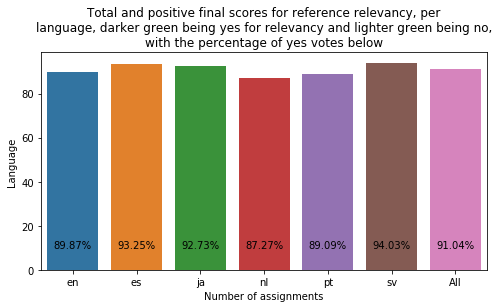

In [22]:
fig, ax = plt.subplots(figsize=(8,4))

annotations_df_is_present_lan = annotations_df[['language_crawl','is_present']]\
            .groupby(['language_crawl'])\
            .sum()\
            .join(annotations_df['language_crawl'].value_counts())

annotations_df_is_present_lan.columns = ['is_present','total']
annotations_df_is_present_lan['per'] =\
    annotations_df_is_present_lan.apply(lambda x: 100*x['is_present']/x['total'], axis=1)
annotations_df_is_present_lan = annotations_df_is_present_lan.reset_index()

annotations_df_is_present_lan = annotations_df_is_present_lan.append(
    {
        'language_crawl':'All',
        'is_present': annotations_df_is_present_lan['is_present'].sum(),
        'total': annotations_df_is_present_lan['total'].sum(),
        'per': 100*annotations_df_is_present_lan['is_present'].sum()/annotations_df_is_present_lan['total'].sum()
    }, ignore_index=True
)

#sns.set_color_codes("pastel")
#g = sns.barplot(x="language_crawl", y="total",
#            data=annotations_df_is_present_lan,
#            color="g", ax=ax)

sns.set_color_codes("deep")
g = sns.barplot(x="language_crawl", y="per",
            data=annotations_df_is_present_lan,
            ax=ax)

#for i, p in enumerate(g.patches):
#    height = p.get_height()
#    width = p.get_width()
#    g.text(i%annotations_df_is_present_lan.shape[0],
#            height-22,
#            '{:1.2f}'.format(height),
#            ha="center")
for i in range(annotations_df_is_present_lan.shape[0]):
    g.text(i,
            10,
            '{:1.2f}%'.format(annotations_df_is_present_lan.loc[i,'per']),
            ha="center")

ax.set(title='Total and positive final scores for reference relevancy, per\nlanguage, darker green being yes for relevancy and lighter green being no,\nwith the percentage of yes votes below',
       ylabel='Language', xlabel = 'Number of assignments')

plt.show()

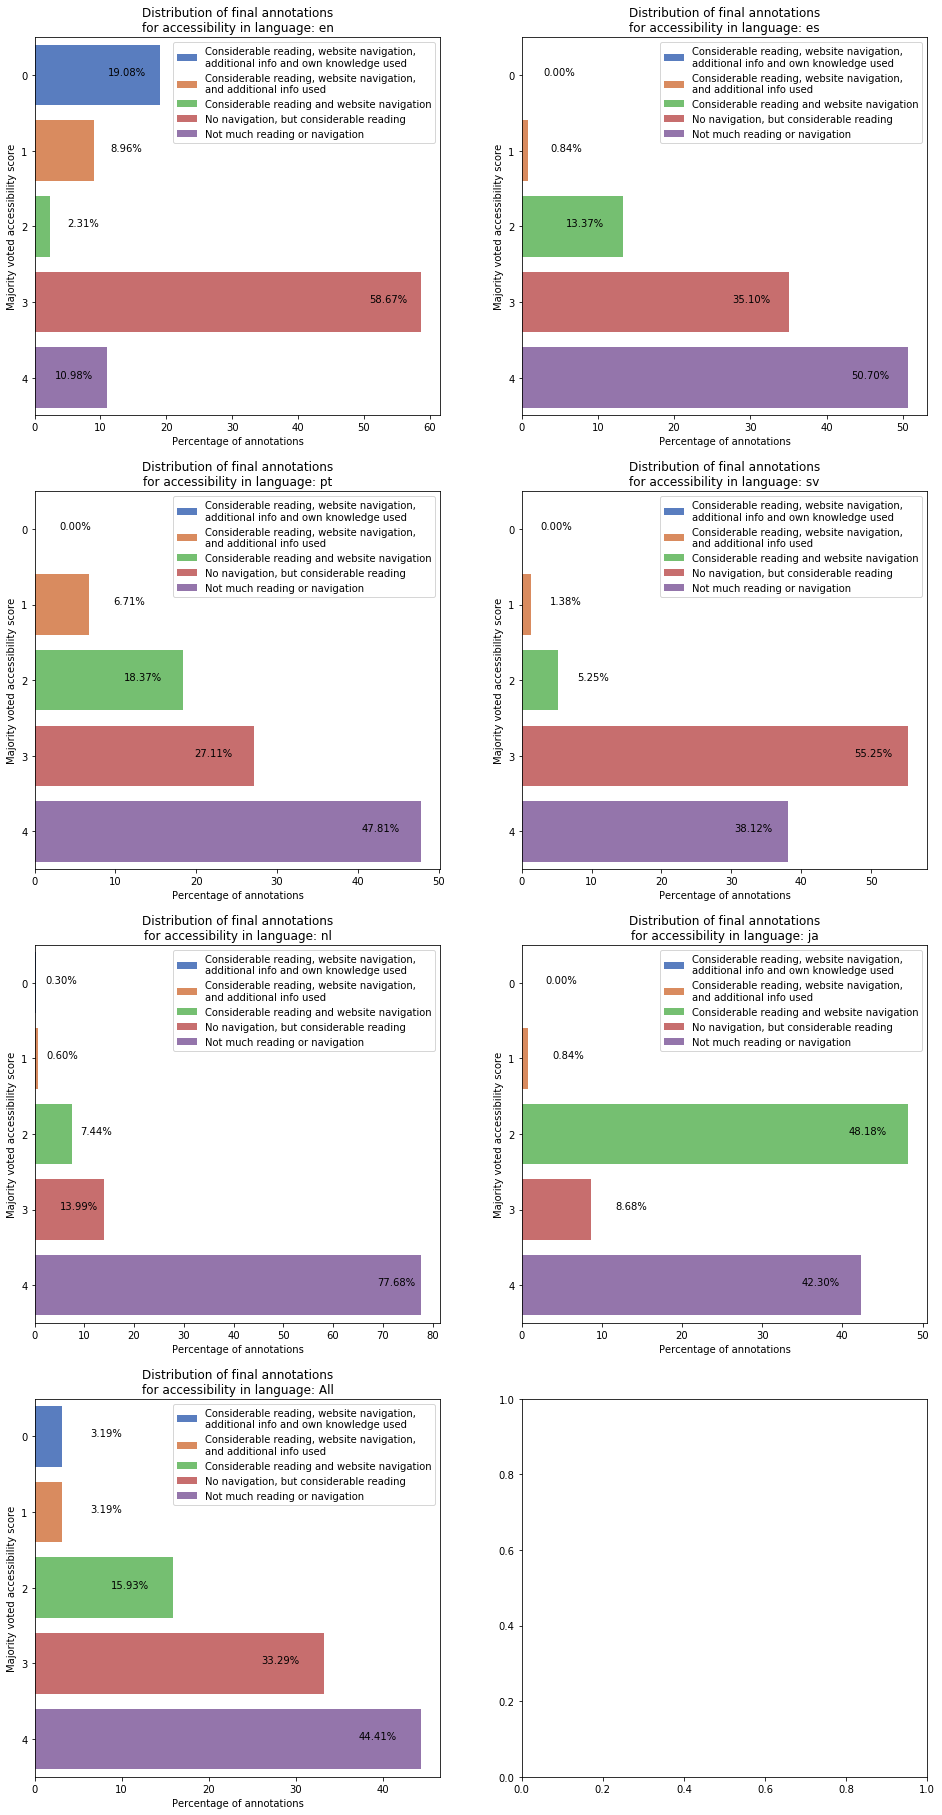

In [24]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df[annotations_df['is_present'] == 1].copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['difficulty'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['difficulty']/sum(annotations_df_lan['difficulty'])
    
    for j in range(5):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'difficulty':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 5, middle = 10, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor accessibility in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted accessibility score'
    )
    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Considerable reading, website navigation,\nadditional info and own knowledge used',
        'Considerable reading, website navigation,\nand additional info used',
        'Considerable reading and website navigation',
        'No navigation, but considerable reading',
        'Not much reading or navigation'
    ])

plt.show()

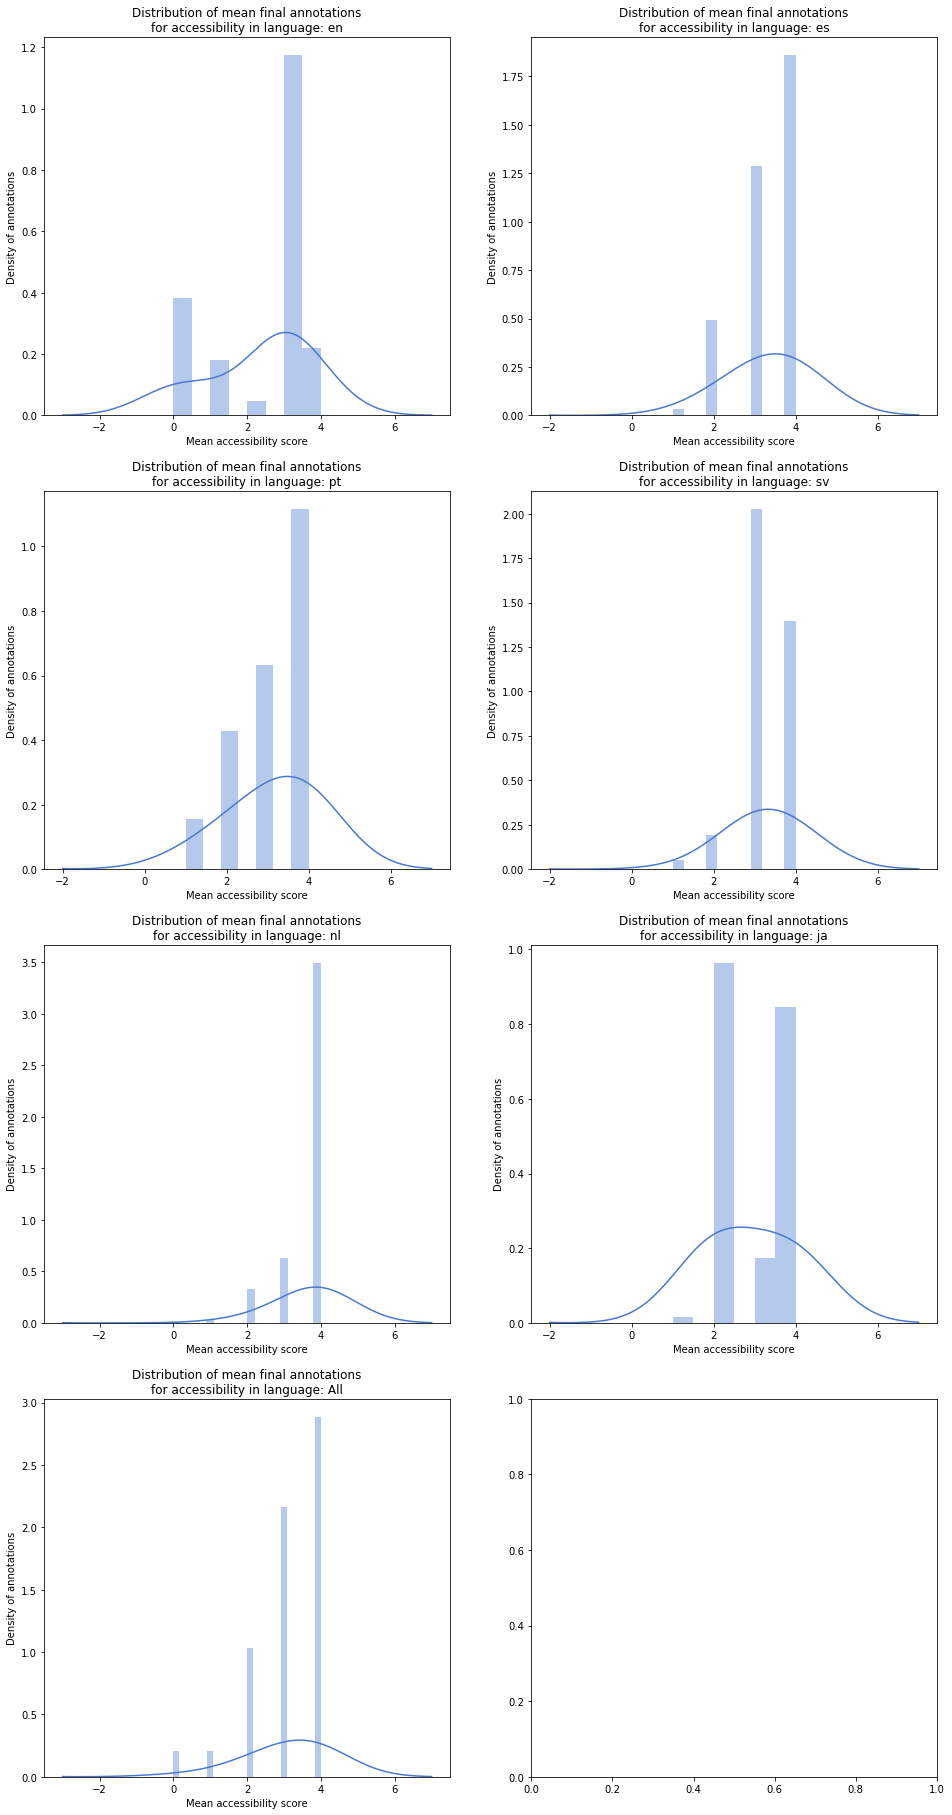

In [40]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df[annotations_df['is_present'] == 1].copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
   
    g = sns.distplot(
        annotations_df_lan['difficulty'],
        ax = ax[i//2,i%2], kde_kws={'bw':1}
    )
   
    ax[i//2,i%2].set(
        title='Distribution of mean final annotations\nfor accessibility in language: {}'.format(language),
        ylabel = 'Density of annotations',
        xlabel = 'Mean accessibility score'
    )

plt.show()

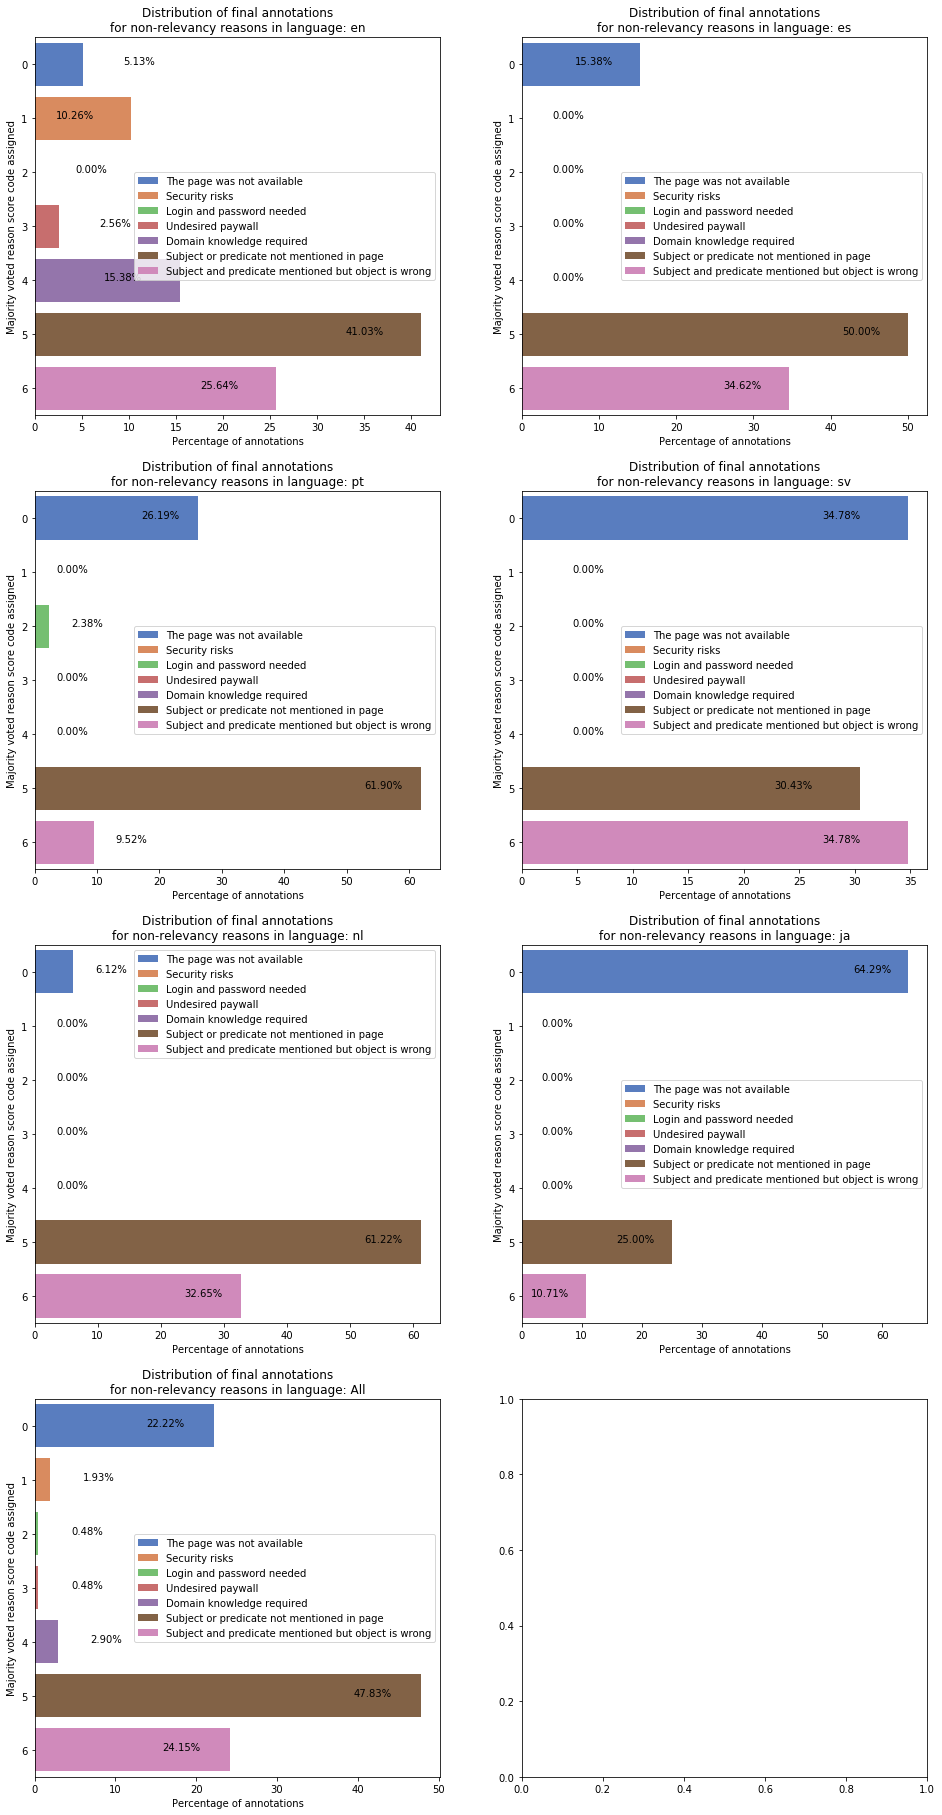

In [72]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df[annotations_df['is_present'] == 0].copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['reason'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['reason']/sum(annotations_df_lan['reason'])
 
    for j in range(7):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'reason':0,'per':0}, ignore_index=True
            )

    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x =6, middle = 10, perc=True)    
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor non-relevancy reasons in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted reason score code assigned'
    )
    
    ax[i//2,i%2].legend(
        handles=ax[i//2,i%2].patches,
        labels=[
            'The page was not available',
            'Security risks',
            'Login and password needed',
            'Undesired paywall',
            'Domain knowledge required',
            'Subject or predicate not mentioned in page',
            'Subject and predicate mentioned but object is wrong'
        ],
        loc = 'best' if i != 0 else 'center right'
    )

plt.show()

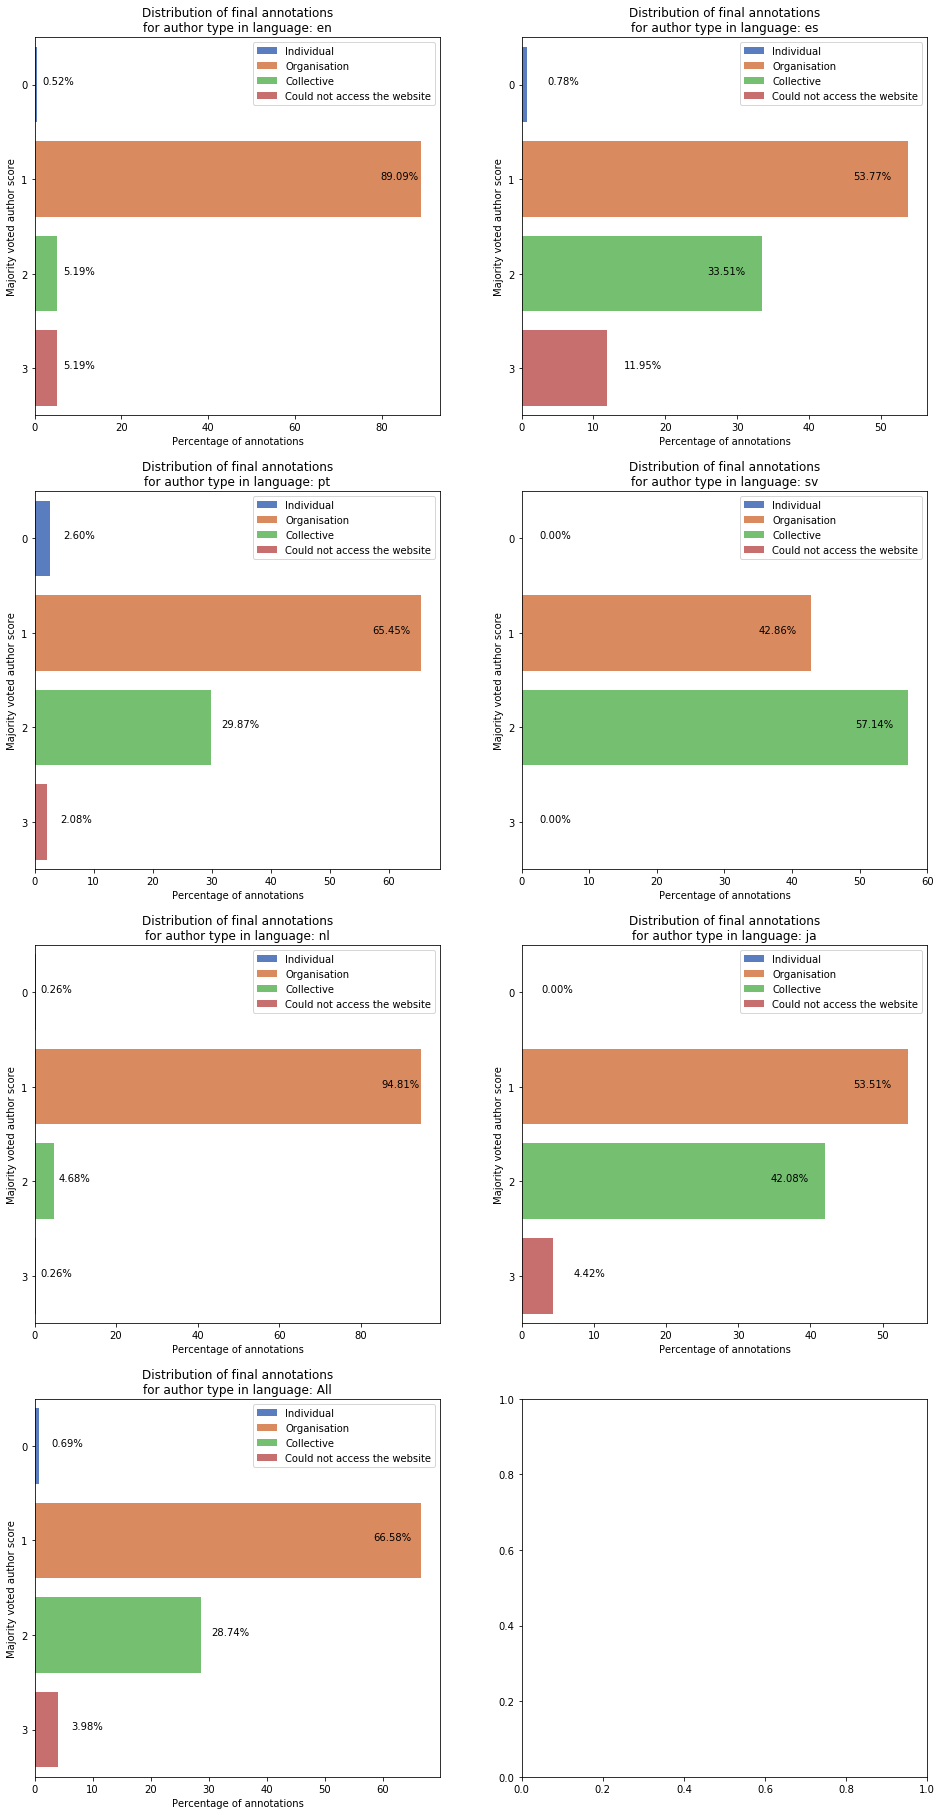

In [73]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['author'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['author']/sum(annotations_df_lan['author'])
    
    for j in range(4):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'author':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor author type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )
    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Individual',
        'Organisation',
        'Collective',
        'Could not access the website'
    ])

plt.show()

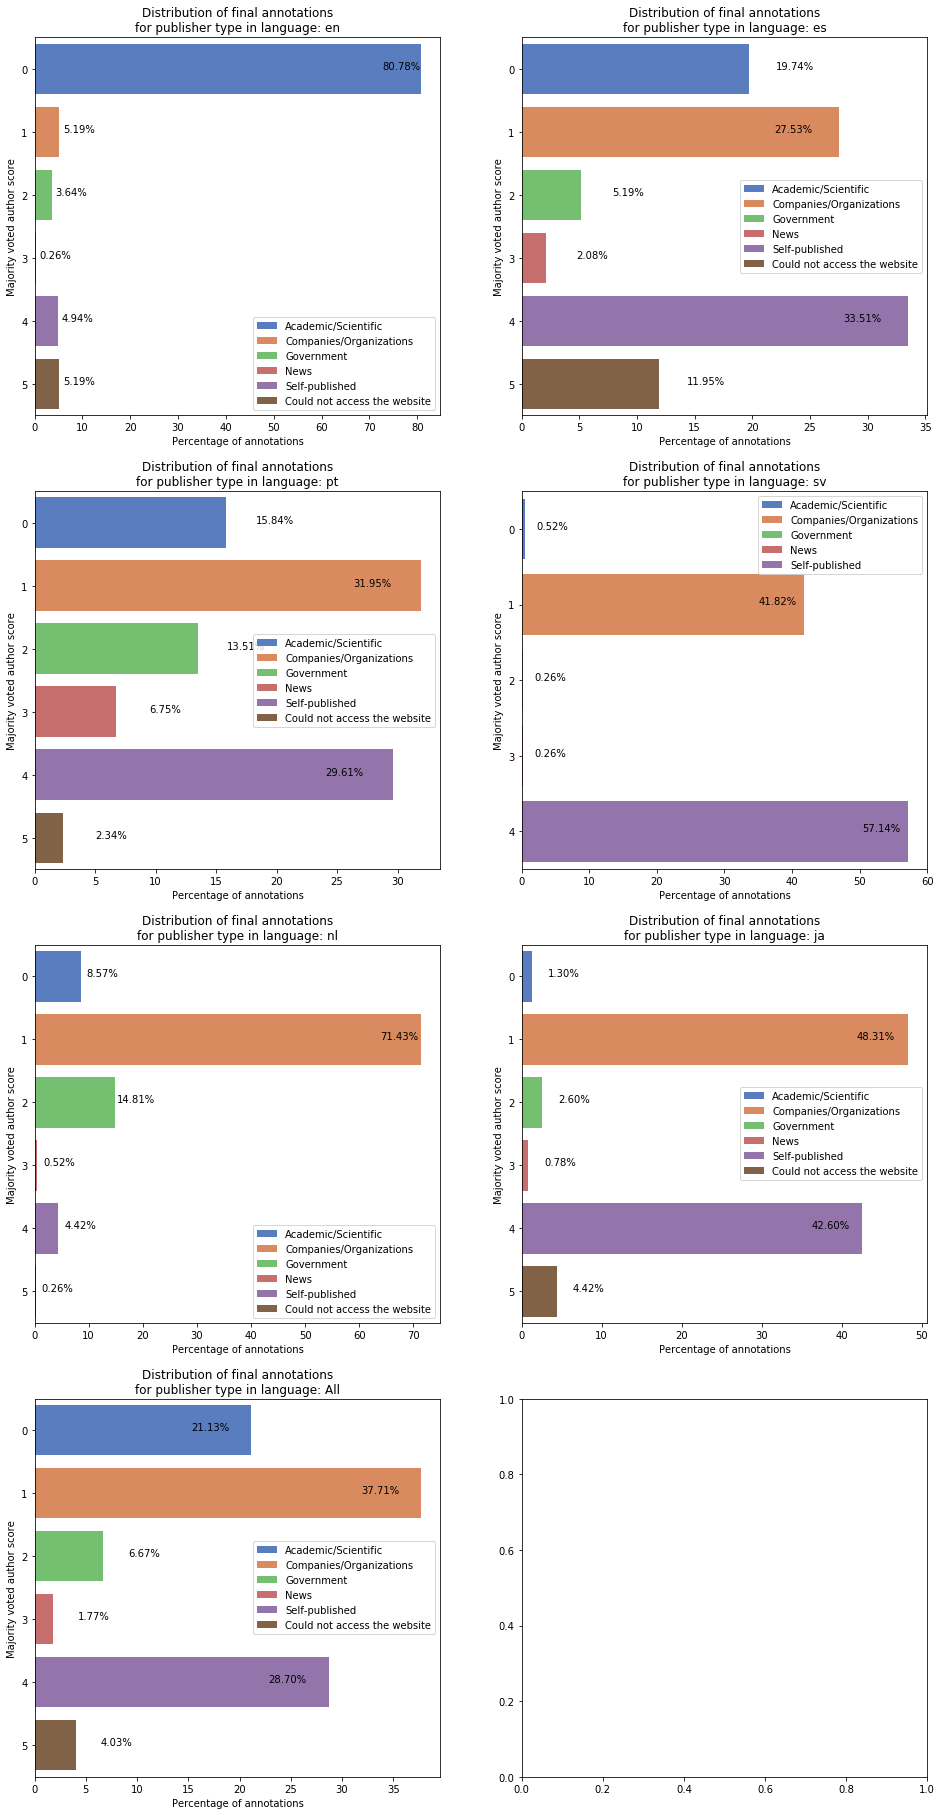

In [74]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['publisher'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['publisher']/sum(annotations_df_lan['publisher'])
    
    for j in range(5):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'publisher':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 4, middle = 20, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor publisher type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )
    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Academic/Scientific',
        'Companies/Organizations',
        'Government',
        'News',
        'Self-published',
        'Could not access the website',
    ])

plt.show()

In [75]:
def get_long_sub_publisher(row):
    if row['publisher'] not in [0,1,3]:
        return float(row['publisher'])
    else:
        return float(str(row['publisher']) + '.' + str(row['sub_publisher']))

annotations_df['long_sub_publisher'] = annotations_df.apply(get_long_sub_publisher, axis=1)

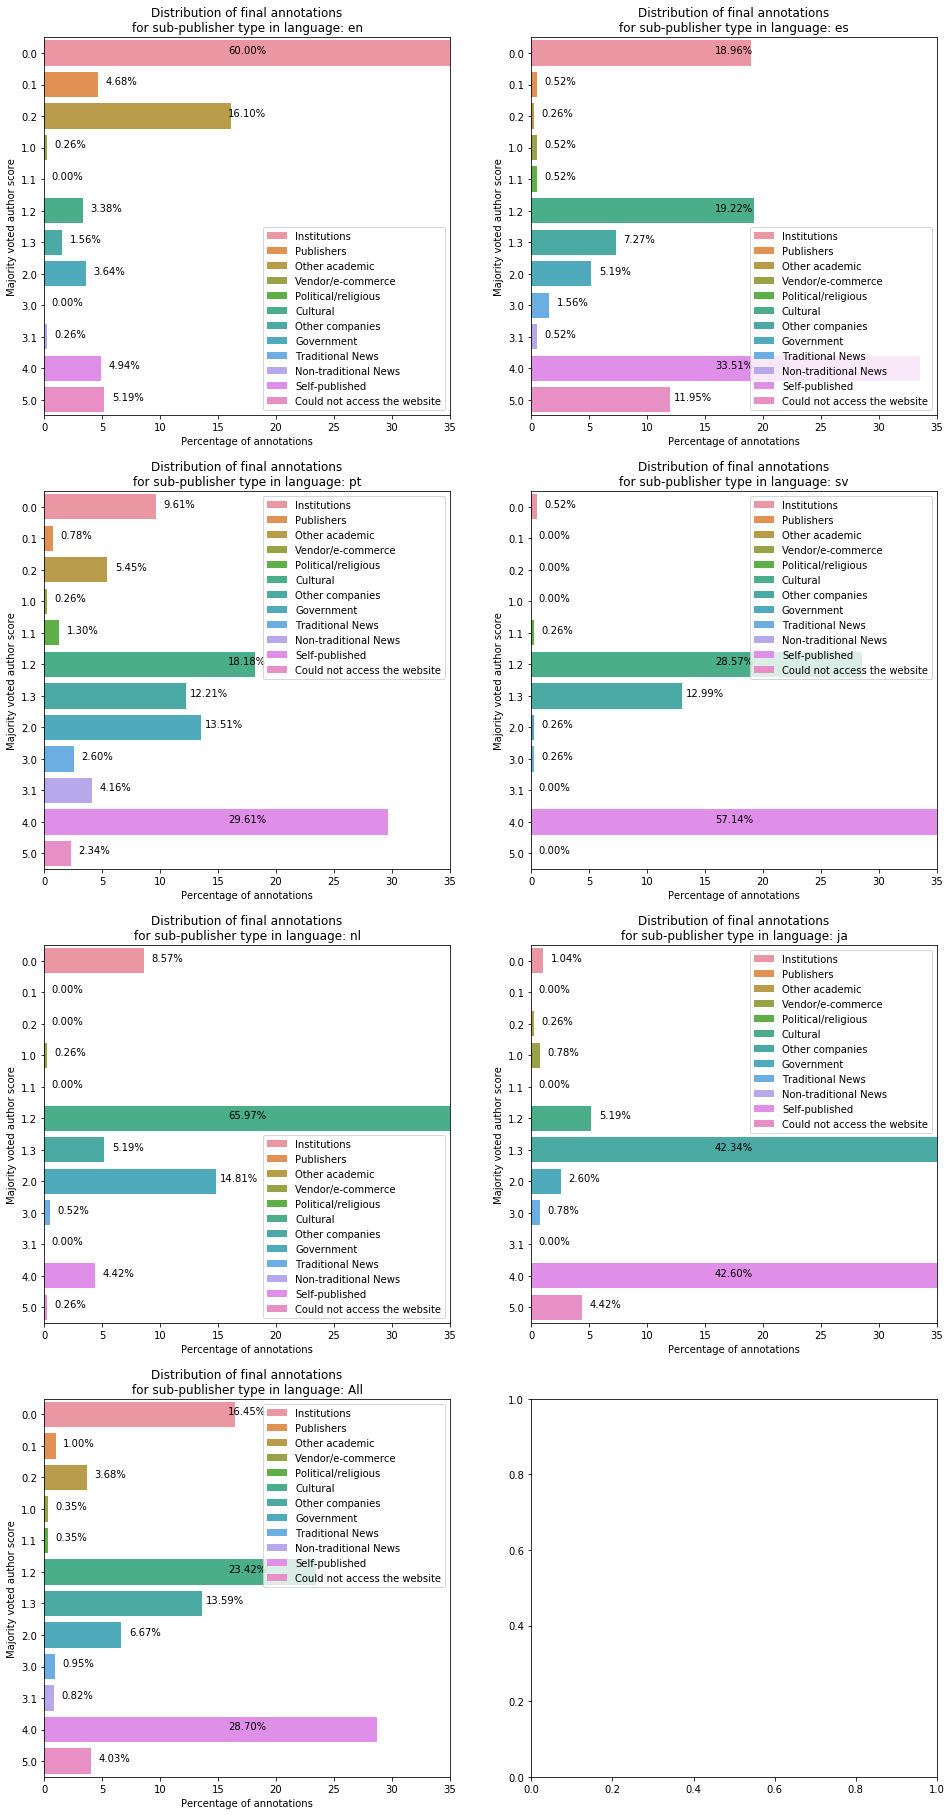

In [76]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['long_sub_publisher'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['long_sub_publisher']/sum(annotations_df_lan['long_sub_publisher'])
    
    for j in [0.0,0.1,0.2,1.0,1.1,1.2,1.3,2.0,3.0,3.1,4.0,5.0]:
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'long_sub_publisher':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    ax[i//2,i%2].set_xlim([0,35])
    annotate_barplot(g, pad_x = 2, middle = 20, perc=True, limit_to_half=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor sub-publisher type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )

    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Institutions',
        'Publishers',
        'Other academic',
        'Vendor/e-commerce',
        'Political/religious',
        'Cultural',
        'Other companies',
        'Government',
        'Traditional News',
        'Non-traditional News',
        'Self-published',
        'Could not access the website',
    ])

plt.show()

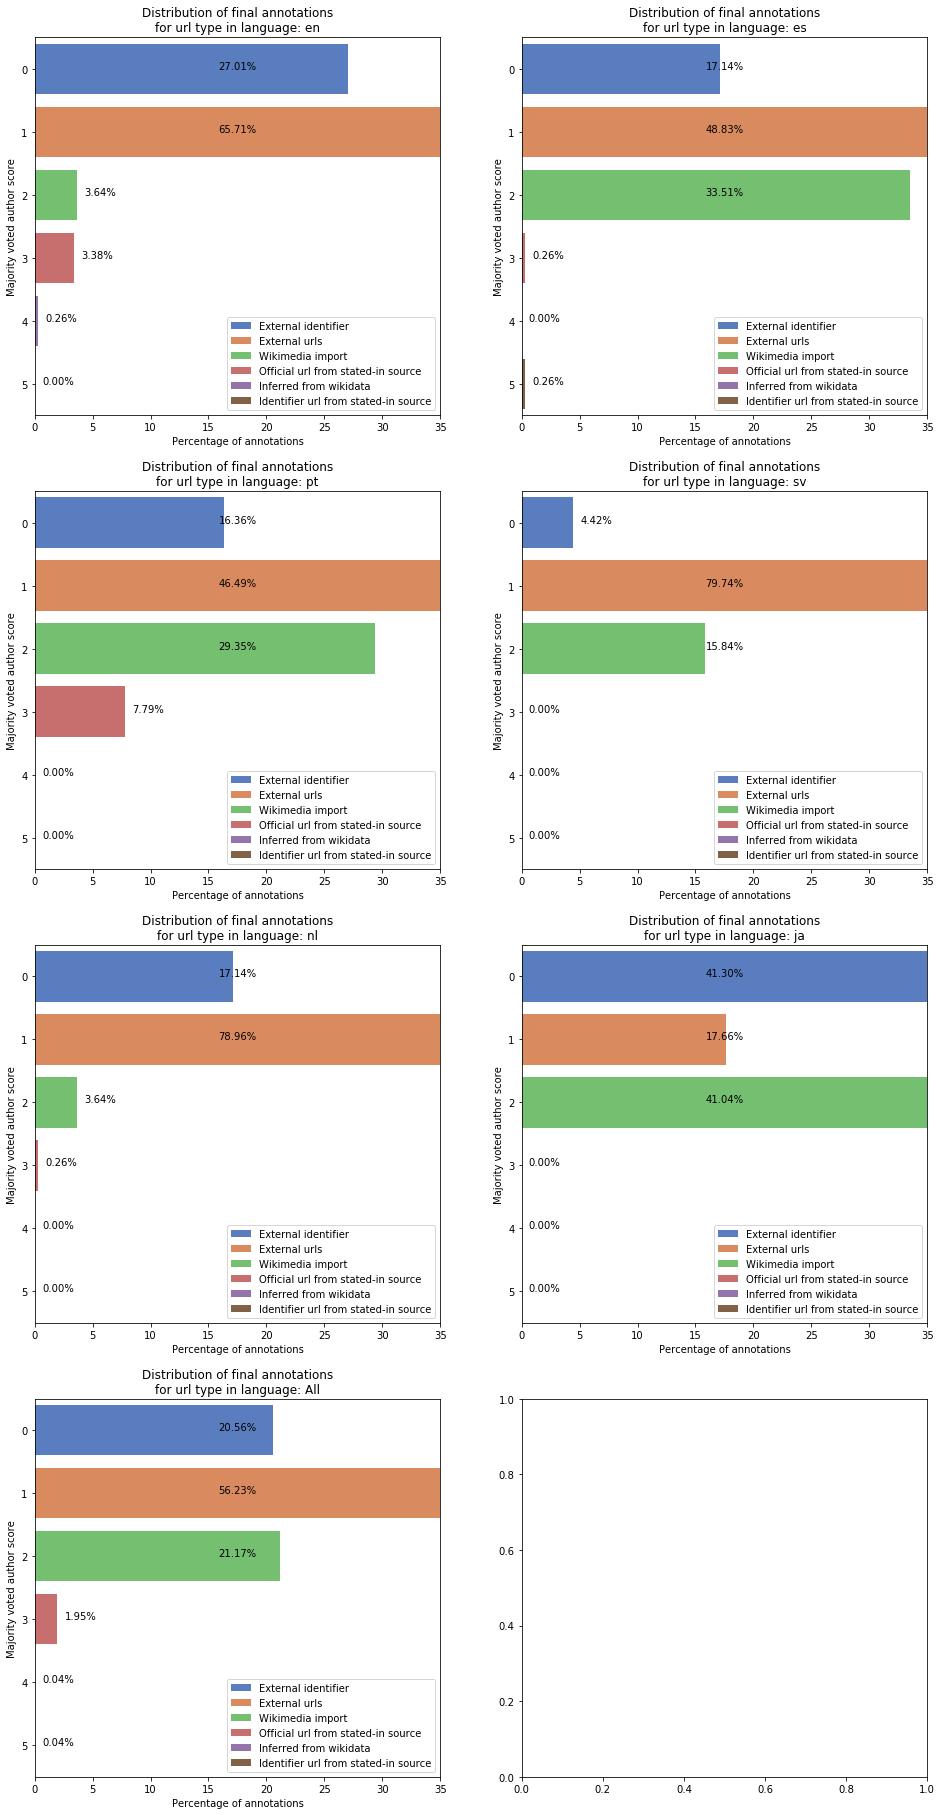

In [77]:
def numcode_url_type(x):
    if x == 'internal_url':
        return 0
    elif x == 'external_url':
        return 1
    elif x == 'wikimedia_import_url':
        return 2
    elif x == 'stated_in_official_url':
        return 3
    elif x == 'inferred_from_wikidata':
        return 4
    elif x == 'stated_in_identifier_url':
        return 5

sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    annotations_df_lan['url_type_numcoded'] = annotations_df_lan['url_type'].apply(numcode_url_type)
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['url_type_numcoded'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['url_type_numcoded']/sum(annotations_df_lan['url_type_numcoded'])
    
    for j in range(6):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'url_type_numcoded':0,'per':0}, ignore_index=True
            )

    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    ax[i//2,i%2].set_xlim([0,35])
    annotate_barplot(g, pad_x = 2, middle = 20, perc=True, limit_to_half=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor url type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )

    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'External identifier',
        'External urls',
        'Wikimedia import',
        'Official url from stated-in source',
        'Inferred from wikidata',
        'Identifier url from stated-in source'
    ], loc='lower right')

plt.show()

## Look up authoritativeness

In [111]:
with open('config/authorit_look_up.json') as f:
    authorit_look_up = json.load(f)
authorit_look_up

{'0': {'0': {'0': True, '1': True, '2': False},
  '1': {'0': True, '1': True, '2': False},
  '2': {'0': True, '1': True, '2': False}},
 '1': {'0': {'0': False, '1': False, '2': False},
  '1': {'0': False, '1': False, '2': False},
  '2': {'0': True, '1': True, '2': False},
  '3': {'0': True, '1': True, '2': False}},
 '2': {'-1': {'0': True, '1': True, '2': False}},
 '3': {'0': {'0': True, '1': True, '2': False},
  '1': {'0': True, '1': False, '2': False}},
 '4': {'-1': {'0': False, '1': False, '2': False}}}

In [124]:
def get_authorit(x):
    if x['author'] == 3 or x['publisher'] == 5:
        return 'Inaccessible'
    a = authorit_look_up[str(x['publisher'])]
    b = a[str(x['sub_publisher'])]
    c = b[str(x['author'])]
    return 'Yes' if c else 'No'
annotations_df['authoritative'] = annotations_df.apply(get_authorit,axis=1)

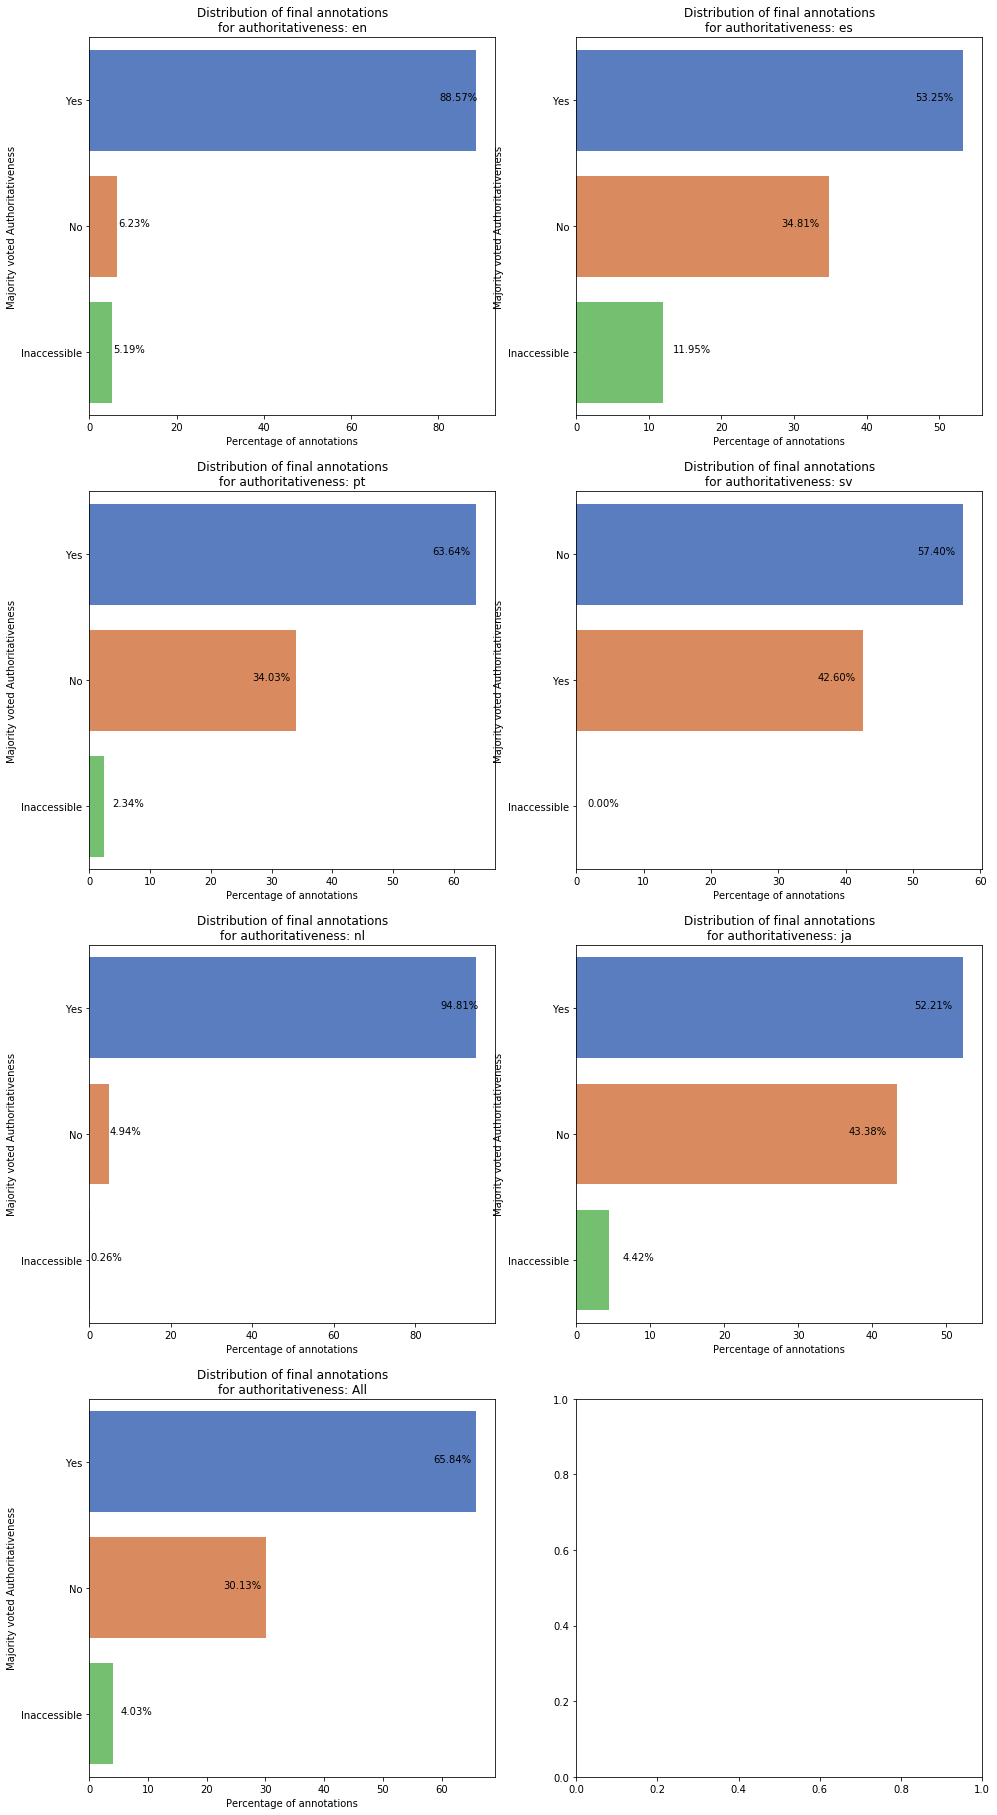

In [134]:
sns.set_palette("muted")

fig, ax = plt.subplots(4,2,figsize=(16,32))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['authoritative'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['authoritative']/sum(annotations_df_lan['authoritative'])
    
    for j in ['Yes','No','Inaccessible']:
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'authoritative':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 4, middle = 20, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor authoritativeness: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted Authoritativeness'
    )

plt.show()

In [126]:
annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reference_id           2310 non-null   object 
 1   url                    2310 non-null   object 
 2   language_crawl         2310 non-null   object 
 3   statement_node         2310 non-null   object 
 4   subject                2310 non-null   object 
 5   predicate              2310 non-null   object 
 6   object                 2310 non-null   object 
 7   url_type               2310 non-null   object 
 8   is_inferred_from       2310 non-null   object 
 9   stated_in              2310 non-null   object 
 10  external_id_prop       2310 non-null   object 
 11  external_id            2310 non-null   object 
 12  internal_urls          2310 non-null   object 
 13  external_url           2310 non-null   object 
 14  wikimedia_import_urls  2310 non-null   object 
 15  retr

# Per URL type

In [79]:
url_types = {
    'internal_url': 'external identifier URL',
    'external_url': 'direct external URL',
    'wikimedia_import_url': 'wikimedia imported URL',
    'stated_in_official_url': 'official stated-in URL'
}

internal_url {'language_crawl': 'All', 'is_present': 450, 'total': 475, 'per': 94.73684210526316}
external_url {'language_crawl': 'All', 'is_present': 1161, 'total': 1299, 'per': 89.37644341801386}
wikimedia_import_url {'language_crawl': 'All', 'is_present': 480, 'total': 489, 'per': 98.15950920245399}
stated_in_official_url {'language_crawl': 'All', 'is_present': 11, 'total': 45, 'per': 24.444444444444443}


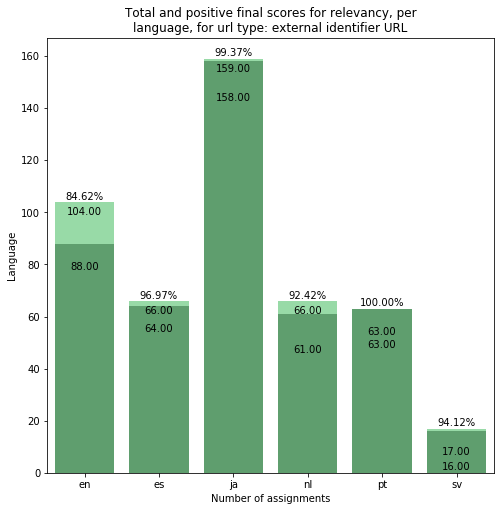

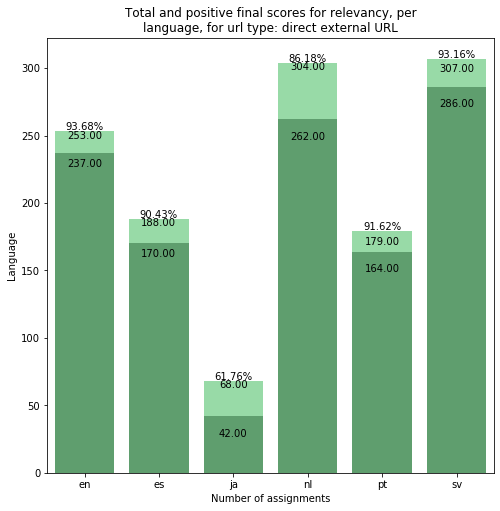

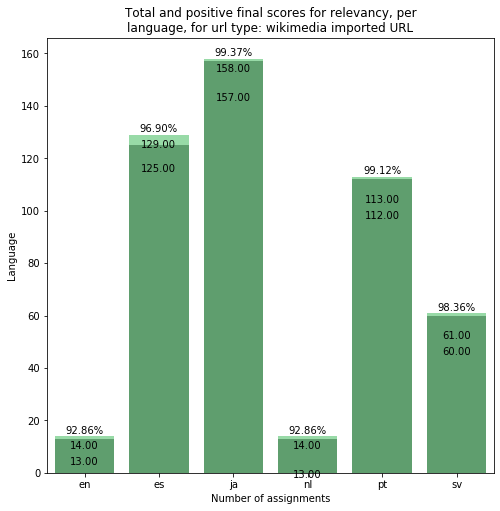

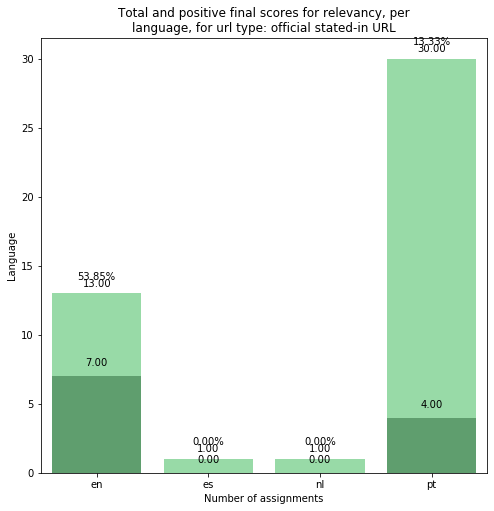

In [88]:
for url_type in url_types:

    fig, ax = plt.subplots(figsize=(8,8))

    annotations_df_url_type = annotations_df[annotations_df['url_type'] == url_type]
    annotations_df_is_present_lan = annotations_df_url_type[['language_crawl','is_present']]\
                .groupby(['language_crawl'])\
                .sum()\
                .join(annotations_df_url_type['language_crawl'].value_counts())

    annotations_df_is_present_lan.columns = ['is_present','total']
    annotations_df_is_present_lan['per'] =\
        annotations_df_is_present_lan.apply(lambda x: 100*x['is_present']/x['total'], axis=1)
    annotations_df_is_present_lan = annotations_df_is_present_lan.reset_index()

    #annotations_df_is_present_lan = annotations_df_is_present_lan.append(
    #    {
    #        'language_crawl':'All',
    #        'is_present': annotations_df_is_present_lan['is_present'].sum(),
    #        'total': annotations_df_is_present_lan['total'].sum(),
    #        'per': 100*annotations_df_is_present_lan['is_present'].sum()/annotations_df_is_present_lan['total'].sum()
    #    }, ignore_index=True
    #)

    sns.set_color_codes("pastel")
    g = sns.barplot(x="language_crawl", y="total",
                data=annotations_df_is_present_lan,
                color="g", ax=ax)

    sns.set_color_codes("deep")
    g = sns.barplot(x="language_crawl", y="is_present",
                data=annotations_df_is_present_lan,
                color="g", ax=ax)

    for i, p in enumerate(g.patches):
        height = p.get_height()
        width = p.get_width()
        g.text(i%annotations_df_is_present_lan.shape[0],
                (height+0.5*(1+(i//4)/2)) if url_type == 'stated_in_official_url' else (height-5*(1+i//4)),
                '{:1.2f}'.format(height),
                ha="center")
    for i in range(annotations_df_is_present_lan.shape[0]):
        g.text(i,
                annotations_df_is_present_lan.loc[i,'total']+1,
                '{:1.2f}%'.format(annotations_df_is_present_lan.loc[i,'per']),
                ha="center")

    ax.set(title='Total and positive final scores for relevancy, per\nlanguage, for url type: {}'.format(url_types[url_type]),
           ylabel='Language', xlabel = 'Number of assignments')
    
    print(url_type, {
        'language_crawl':'All',
        'is_present': annotations_df_is_present_lan['is_present'].sum(),
        'total': annotations_df_is_present_lan['total'].sum(),
        'per': 100*annotations_df_is_present_lan['is_present'].sum()/annotations_df_is_present_lan['total'].sum()
    })

plt.show()

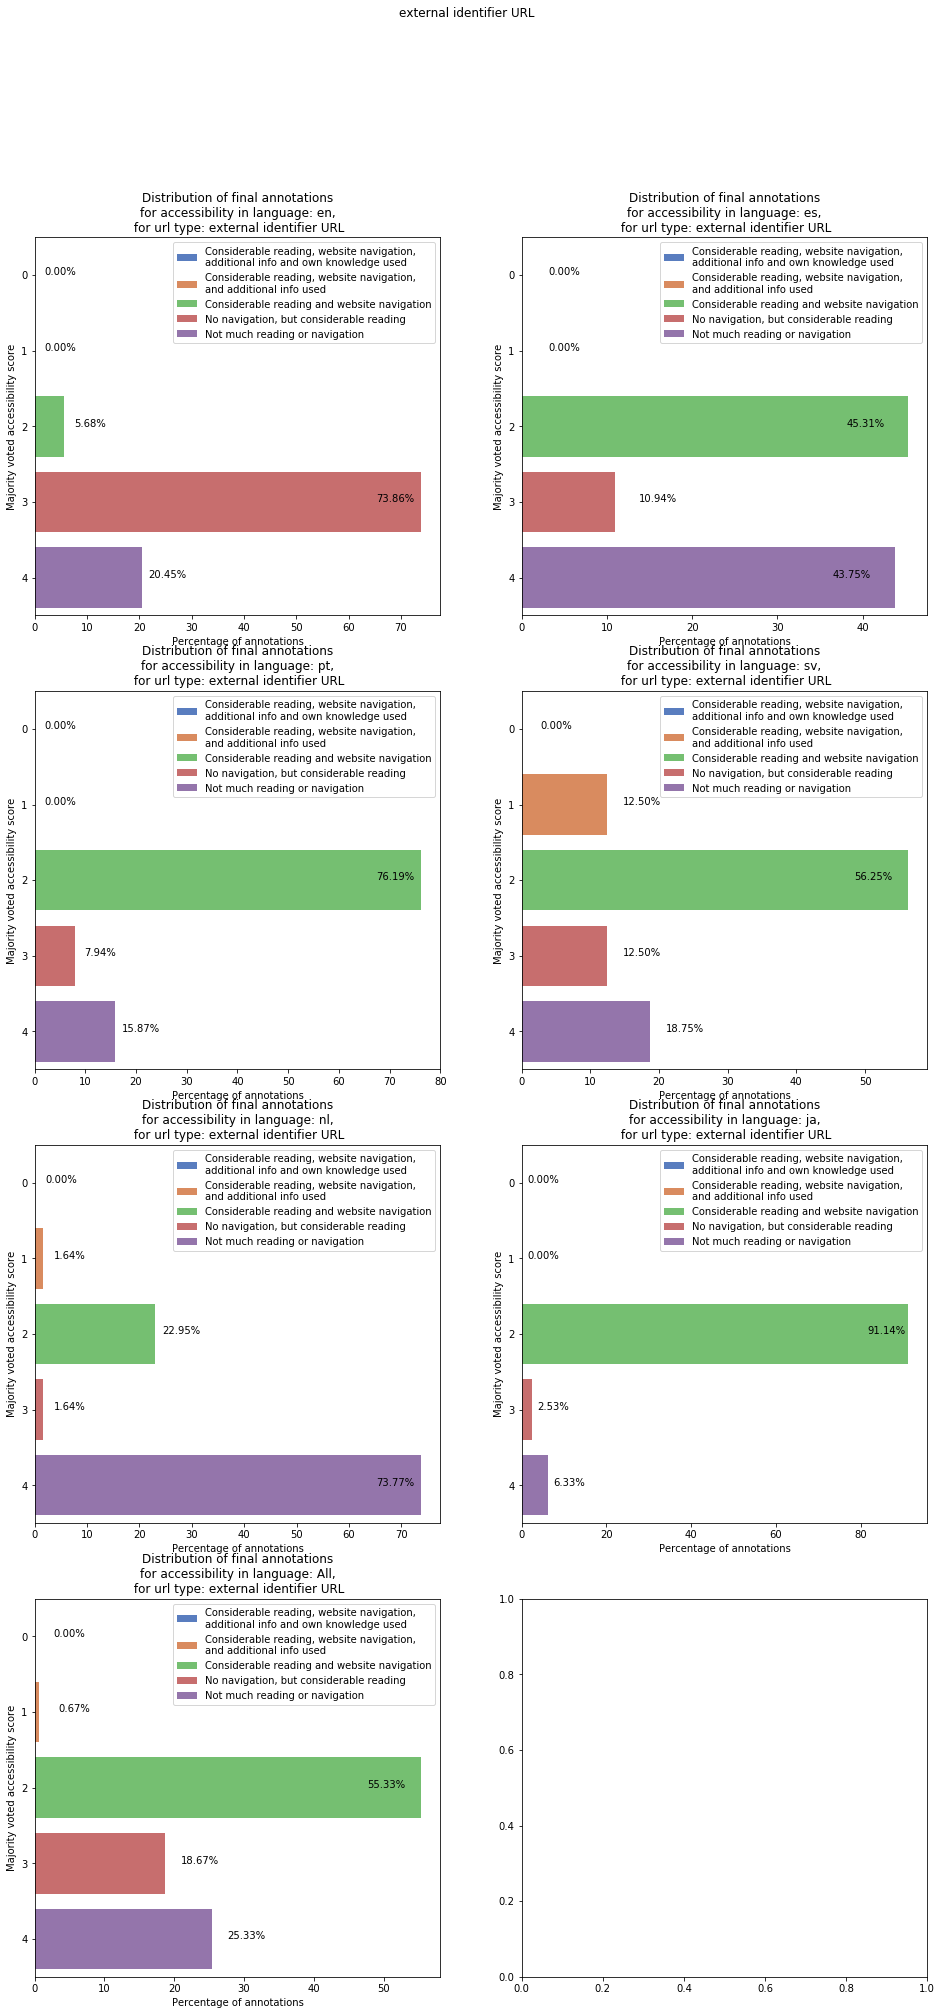

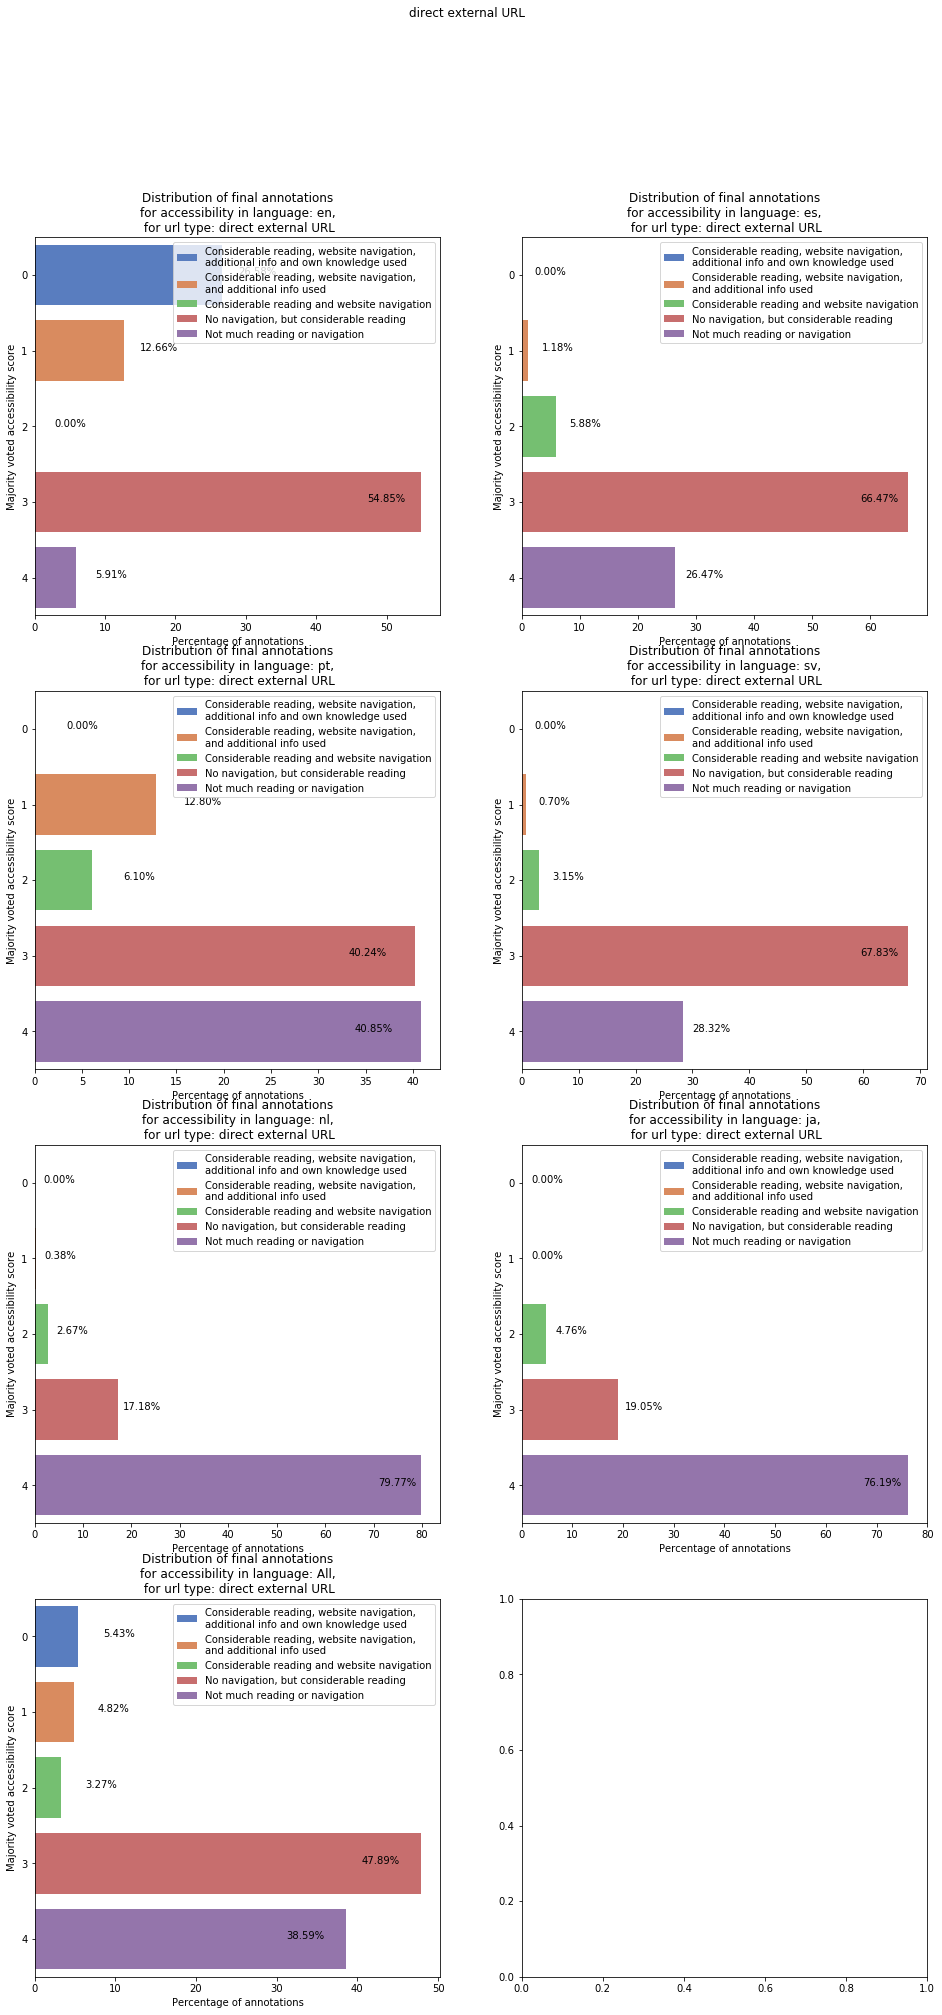

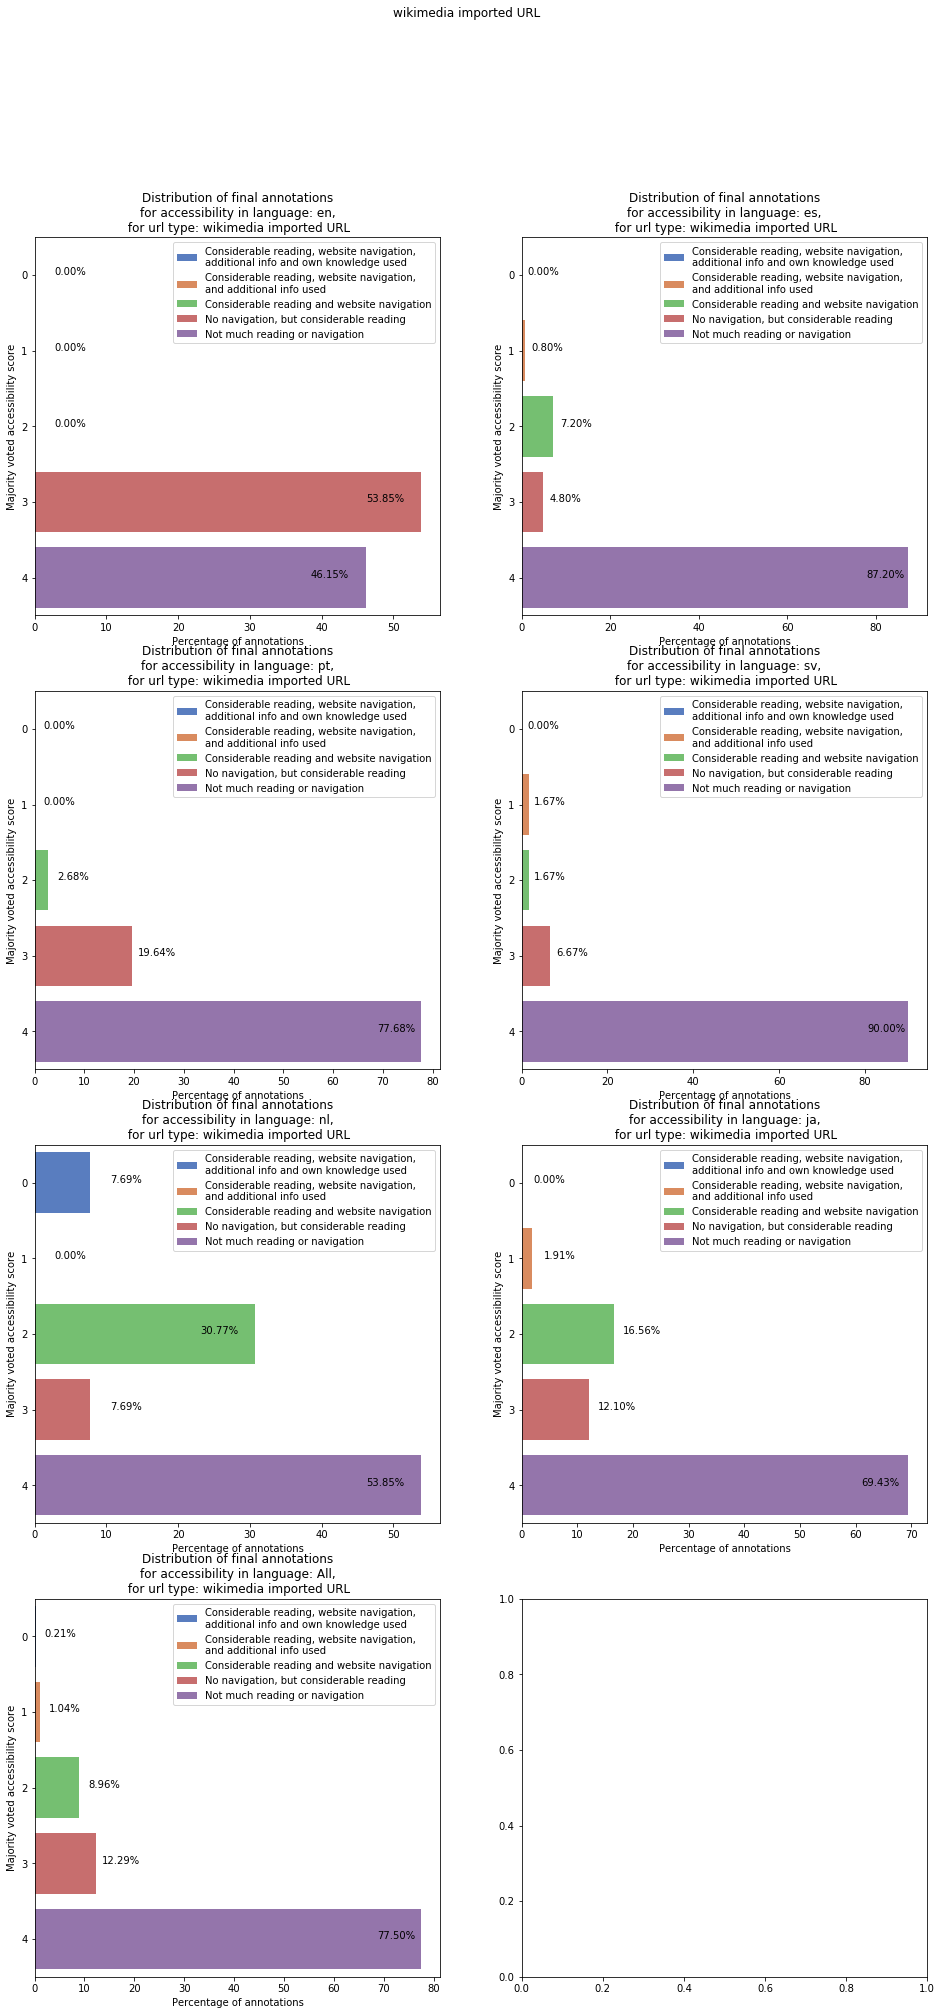

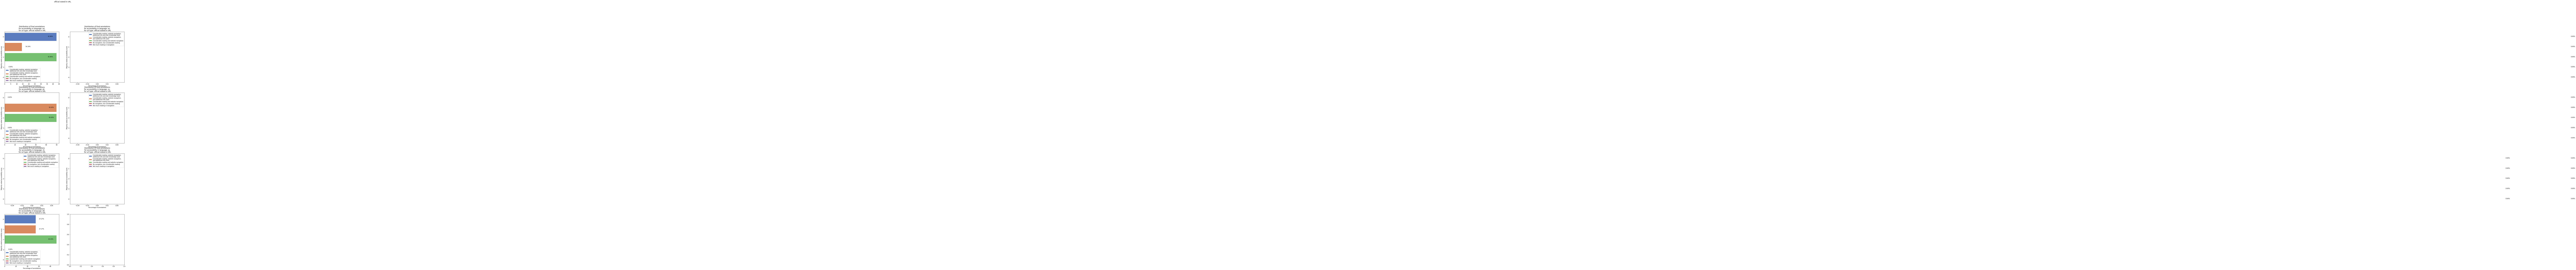

In [89]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(4,2,figsize=(16,32))
    
    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df[annotations_df['is_present'] == 1].copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['difficulty'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['difficulty']/sum(annotations_df_lan['difficulty'])

        for j in range(5):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'difficulty':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor accessibility in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted accessibility score'
        )
        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Considerable reading, website navigation,\nadditional info and own knowledge used',
            'Considerable reading, website navigation,\nand additional info used',
            'Considerable reading and website navigation',
            'No navigation, but considerable reading',
            'Not much reading or navigation'
        ])

    plt.show()

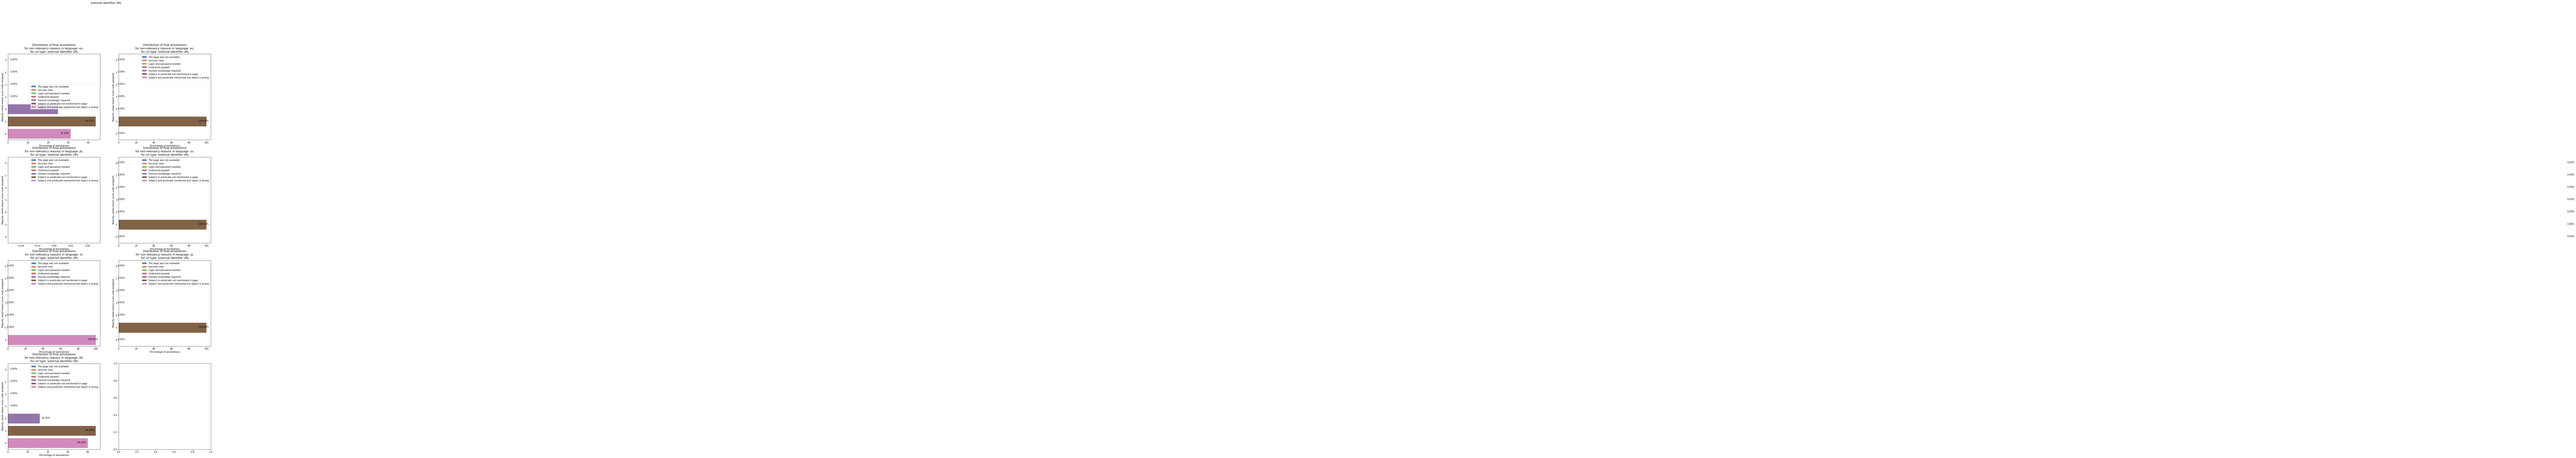

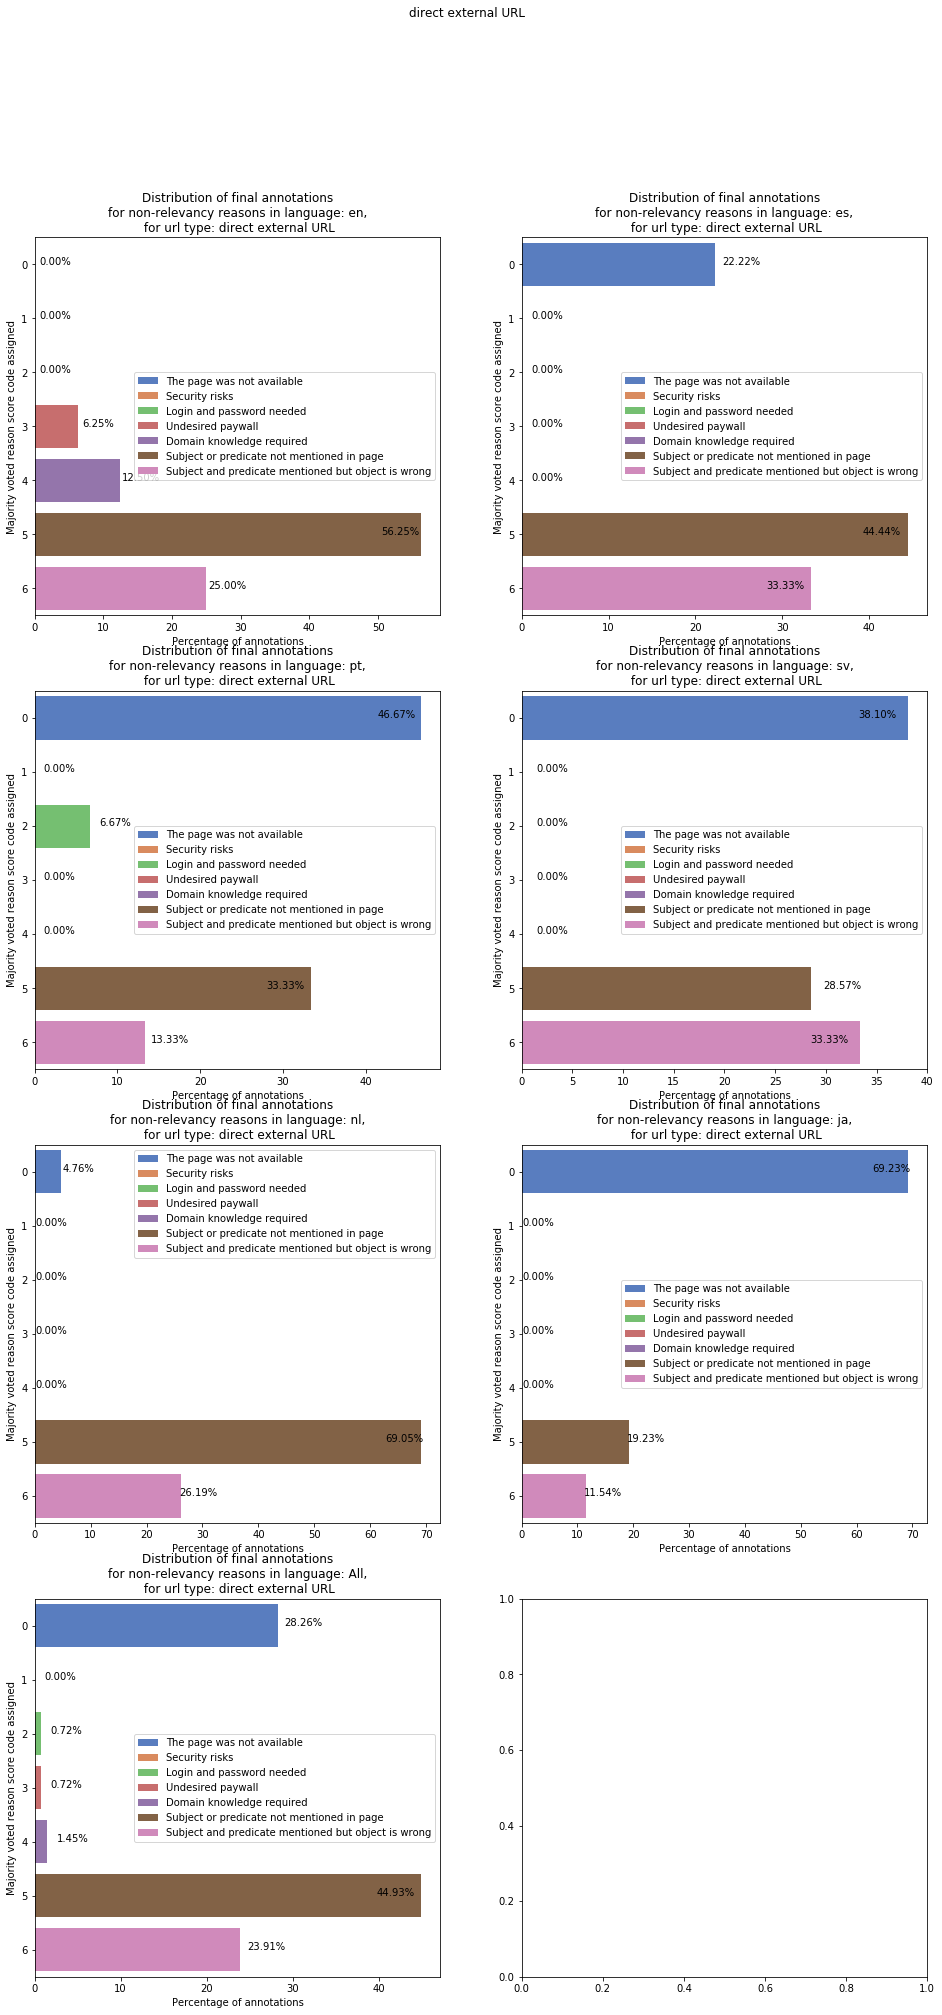

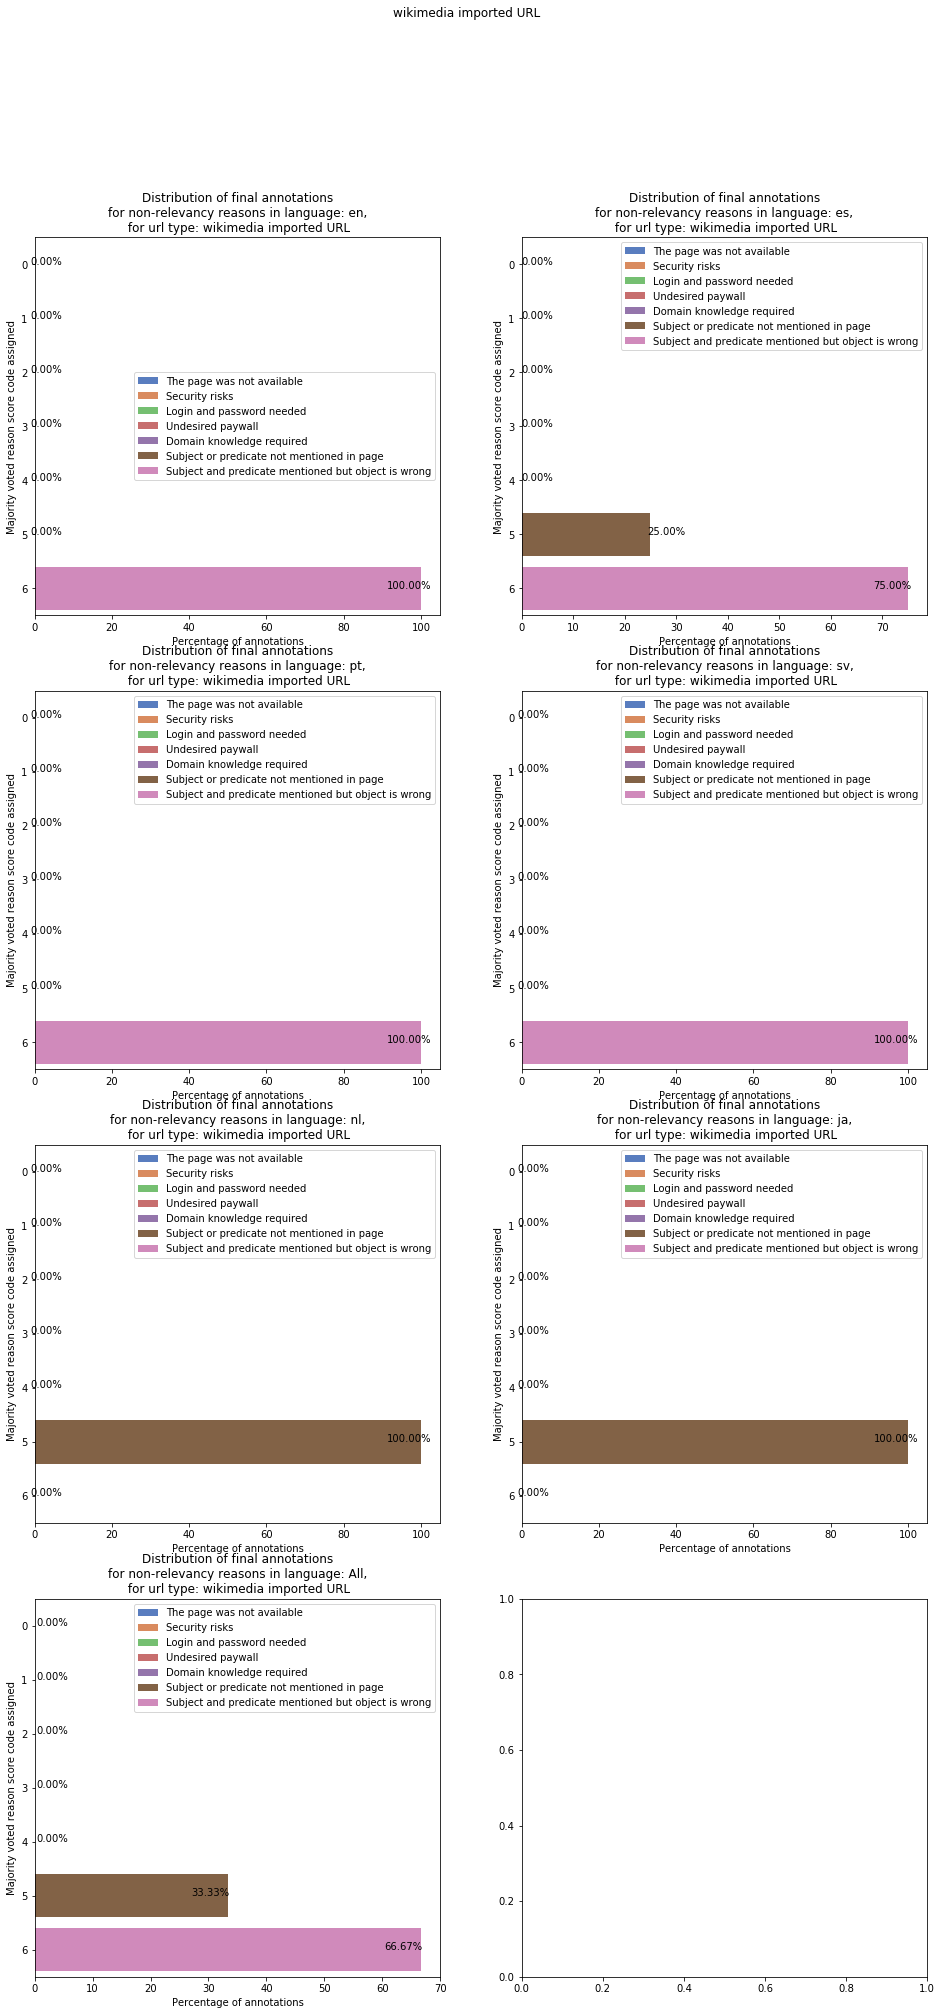

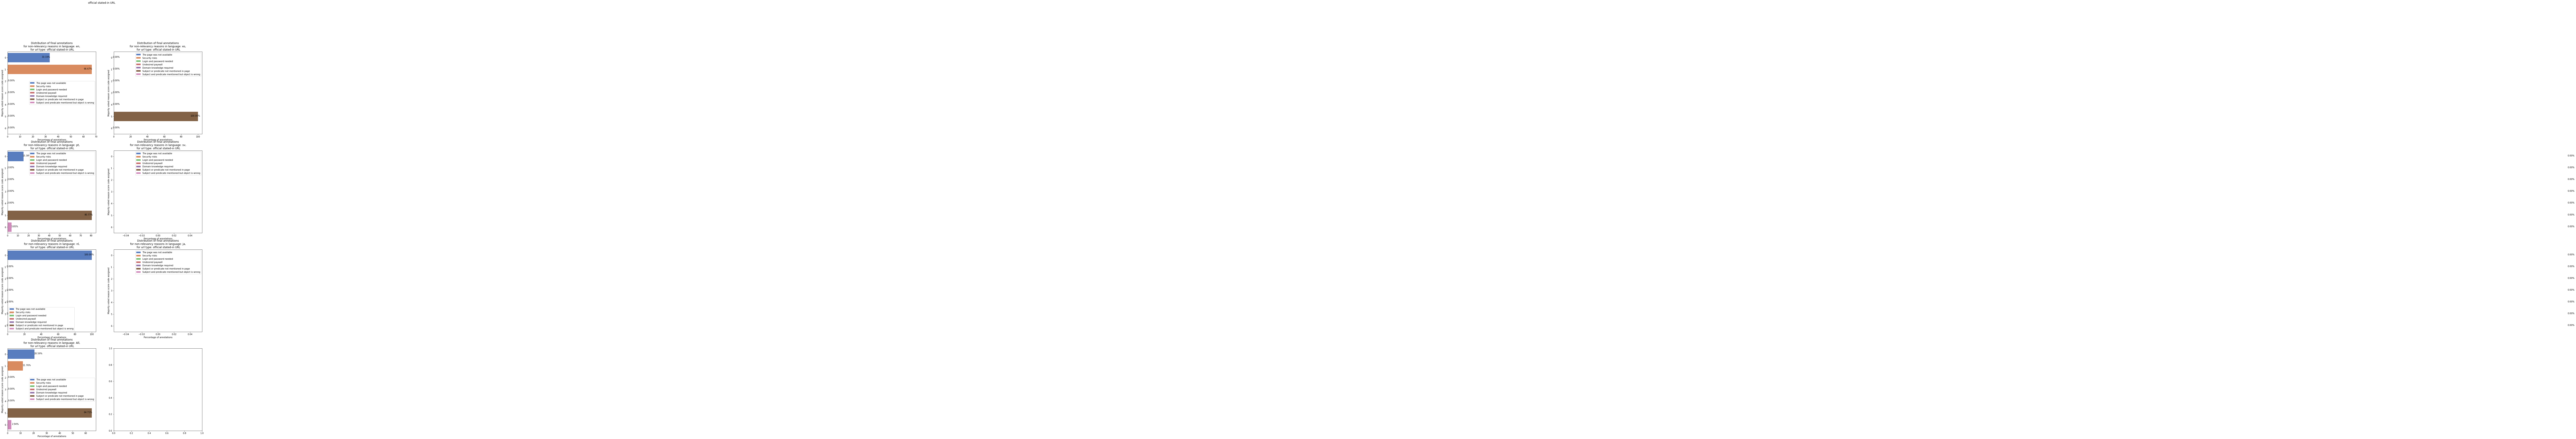

In [90]:
for url_type in url_types:
    
    sns.set_palette("muted")

    fig, ax = plt.subplots(4,2,figsize=(16,32))
    
    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df[annotations_df['is_present'] == 0].copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['reason'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['reason']/sum(annotations_df_lan['reason'])

        for j in range(7):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'reason':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 3, middle = 30, perc=True)    
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor non-relevancy reasons in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted reason score code assigned'
        )

        ax[i//2,i%2].legend(
            handles=ax[i//2,i%2].patches,
            labels=[
                'The page was not available',
                'Security risks',
                'Login and password needed',
                'Undesired paywall',
                'Domain knowledge required',
                'Subject or predicate not mentioned in page',
                'Subject and predicate mentioned but object is wrong'
            ],
            loc = 'best' if i != 0 else 'center right'
        )

    plt.show()

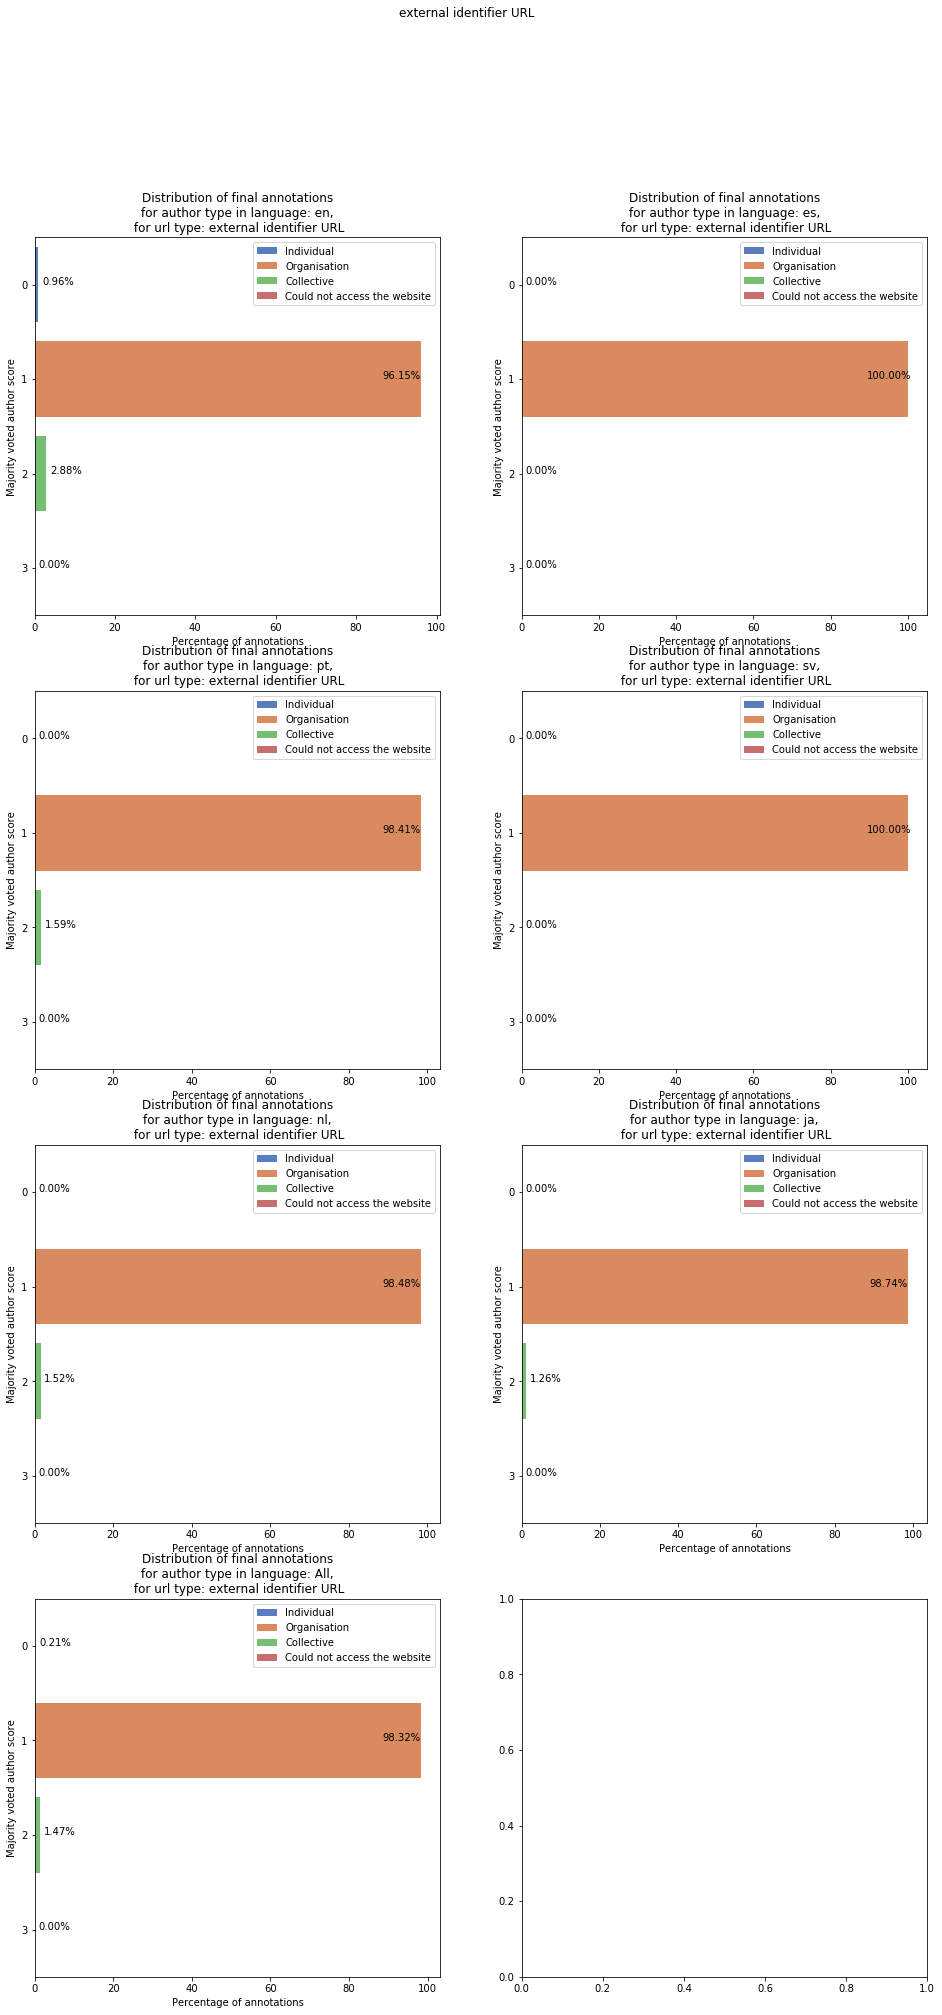

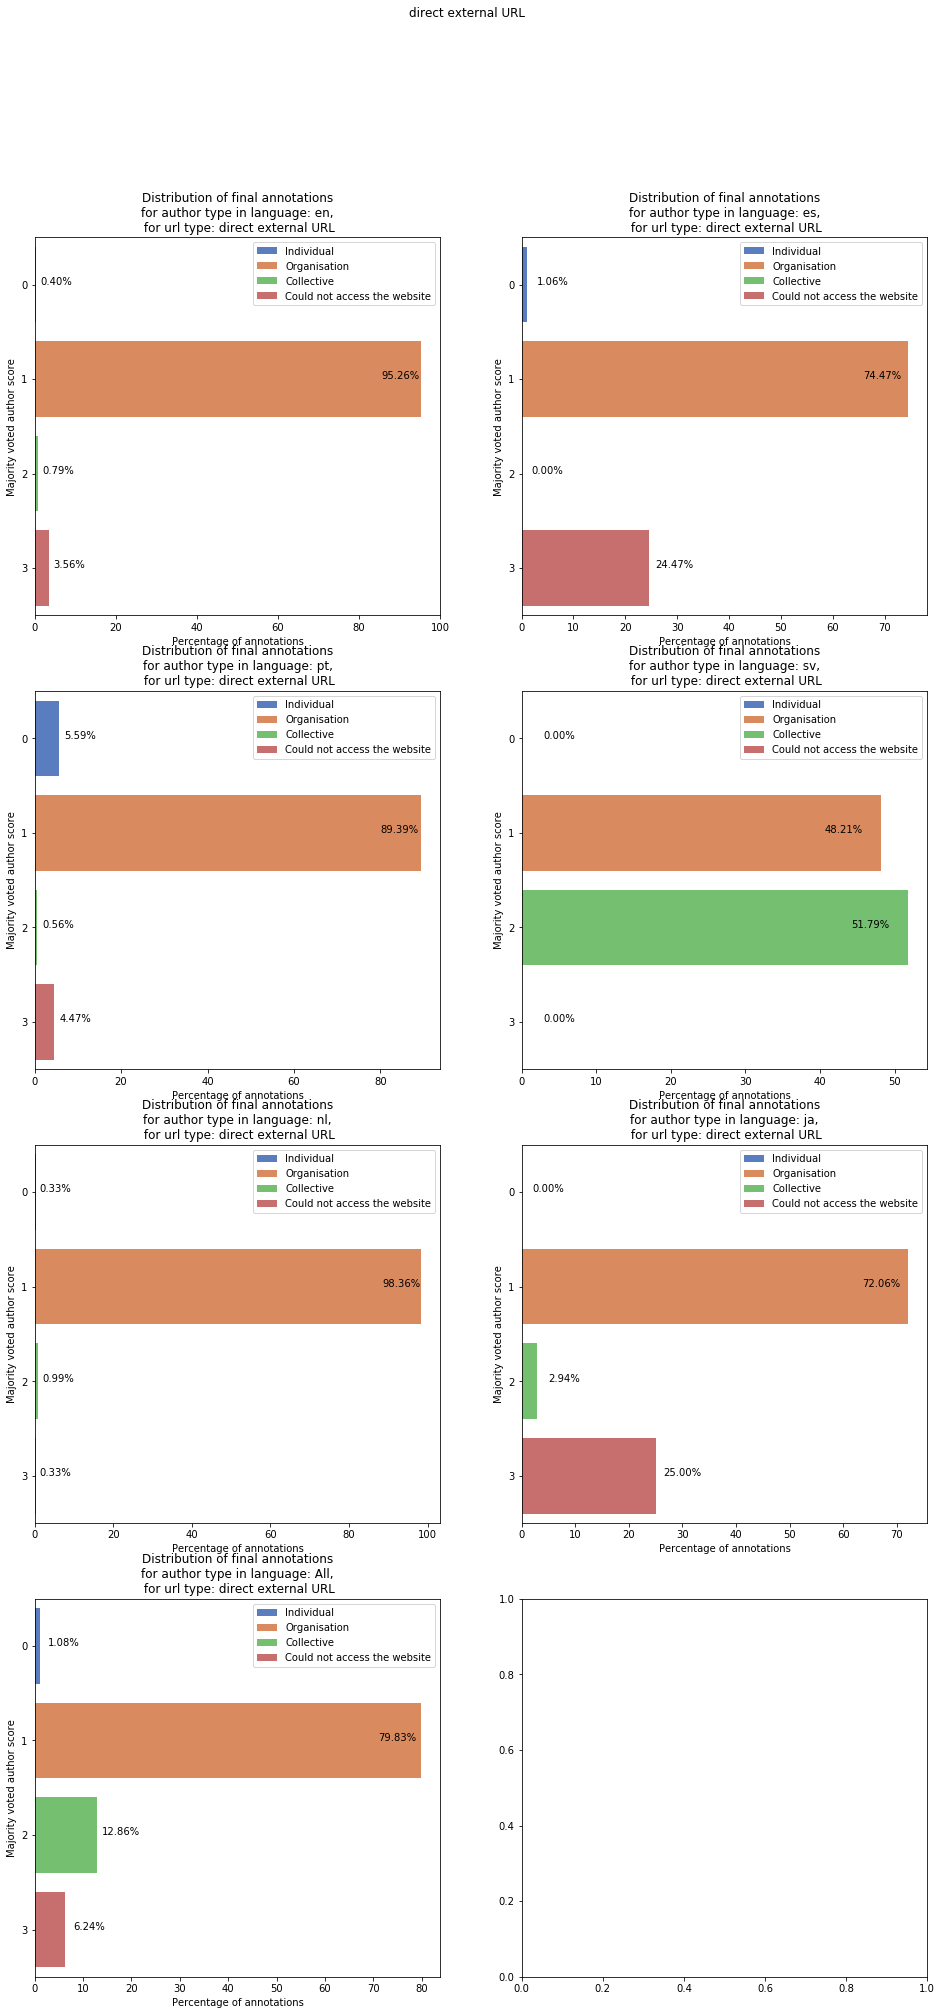

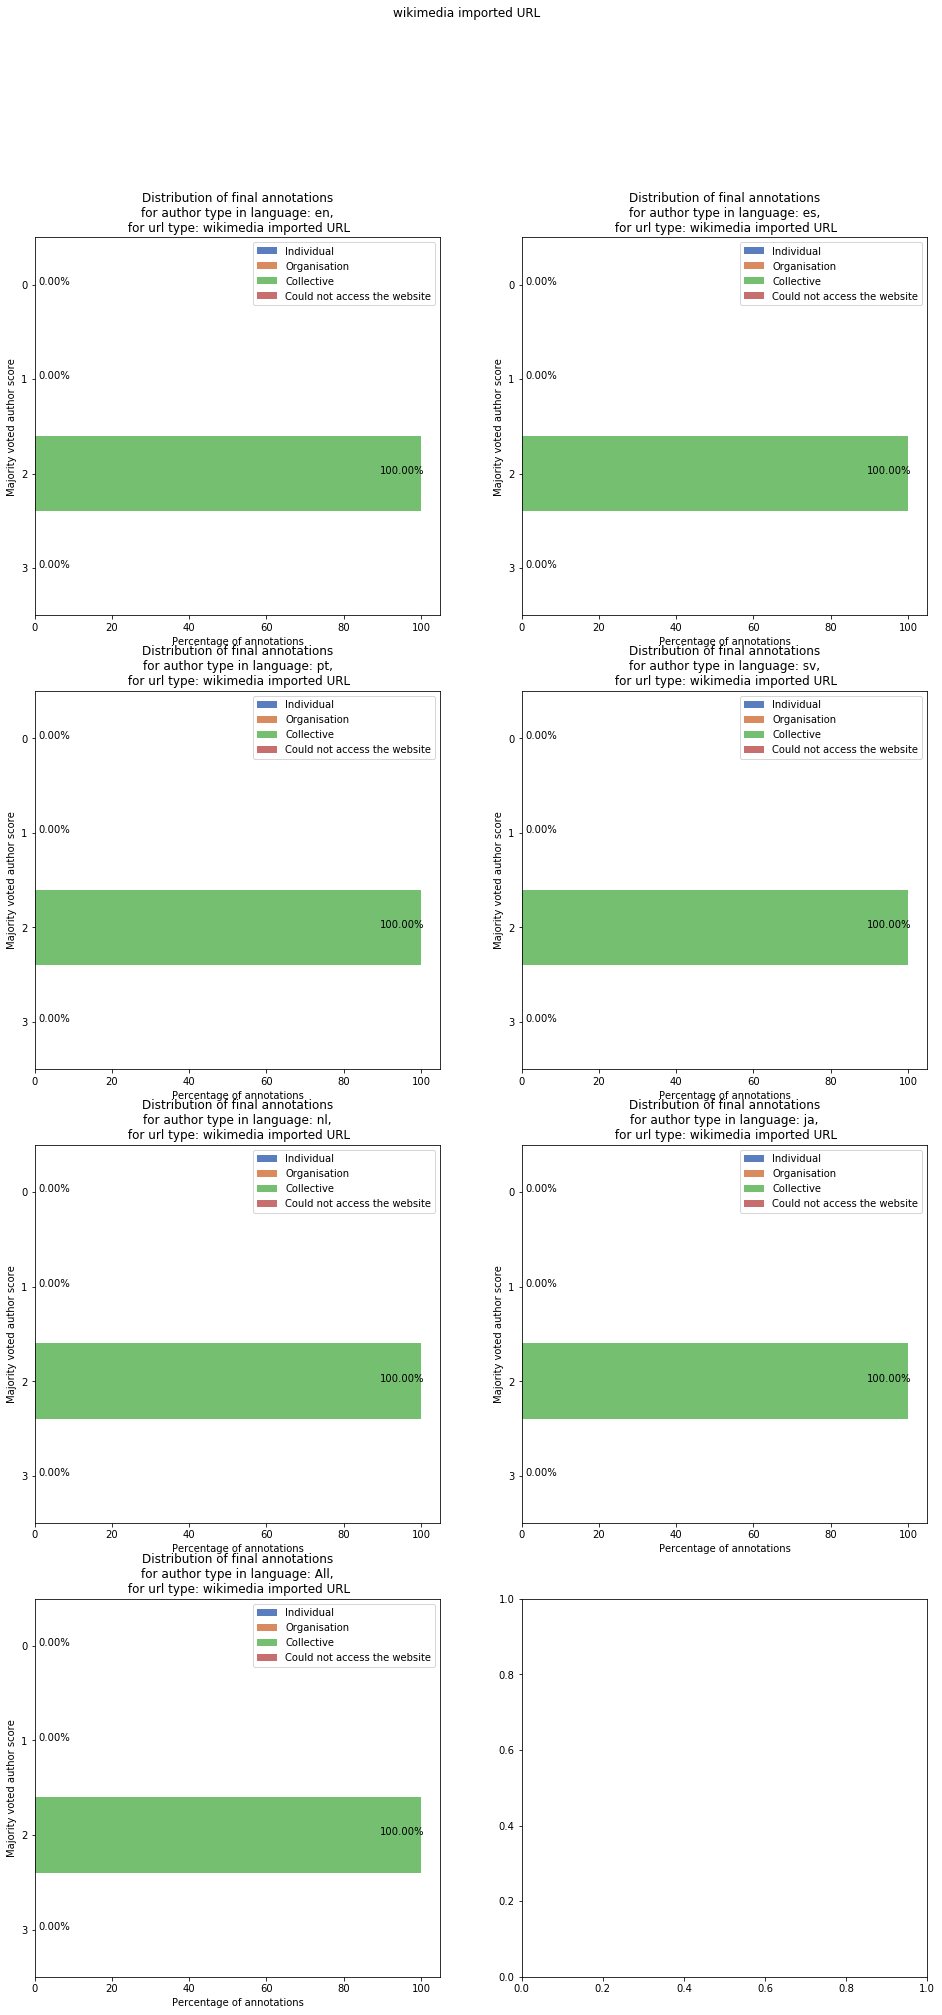

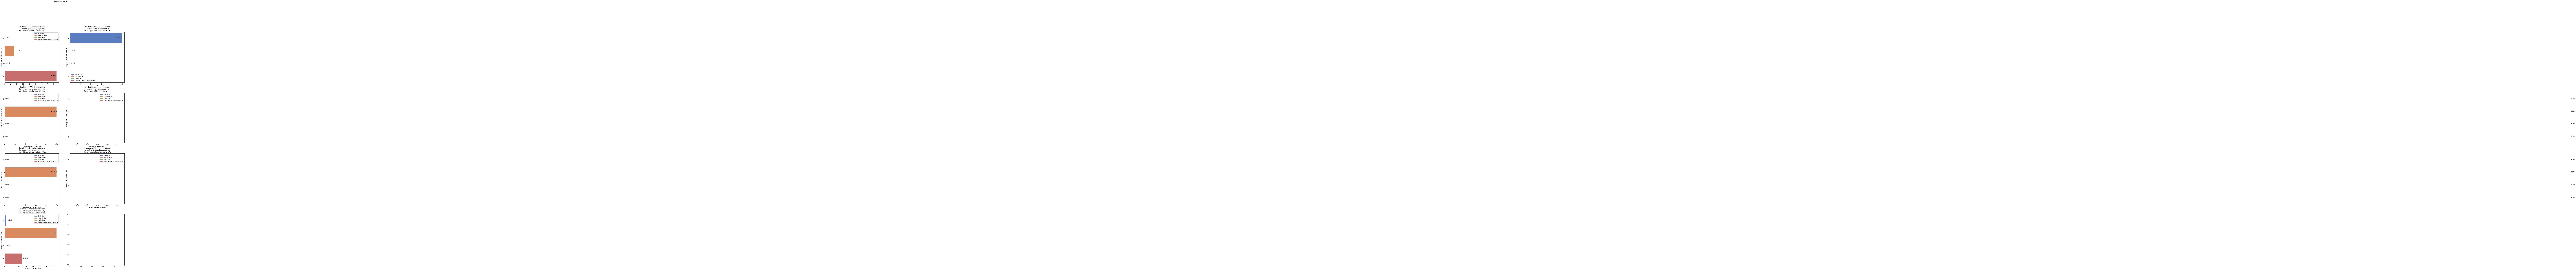

In [91]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(4,2,figsize=(16,32))
    
    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['author'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['author']/sum(annotations_df_lan['author'])

        for j in range(4):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'author':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor author type in language: {},\n for url type: {}'.format(language,url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted author score'
        )
        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Individual',
            'Organisation',
            'Collective',
            'Could not access the website'
        ])

    plt.show()

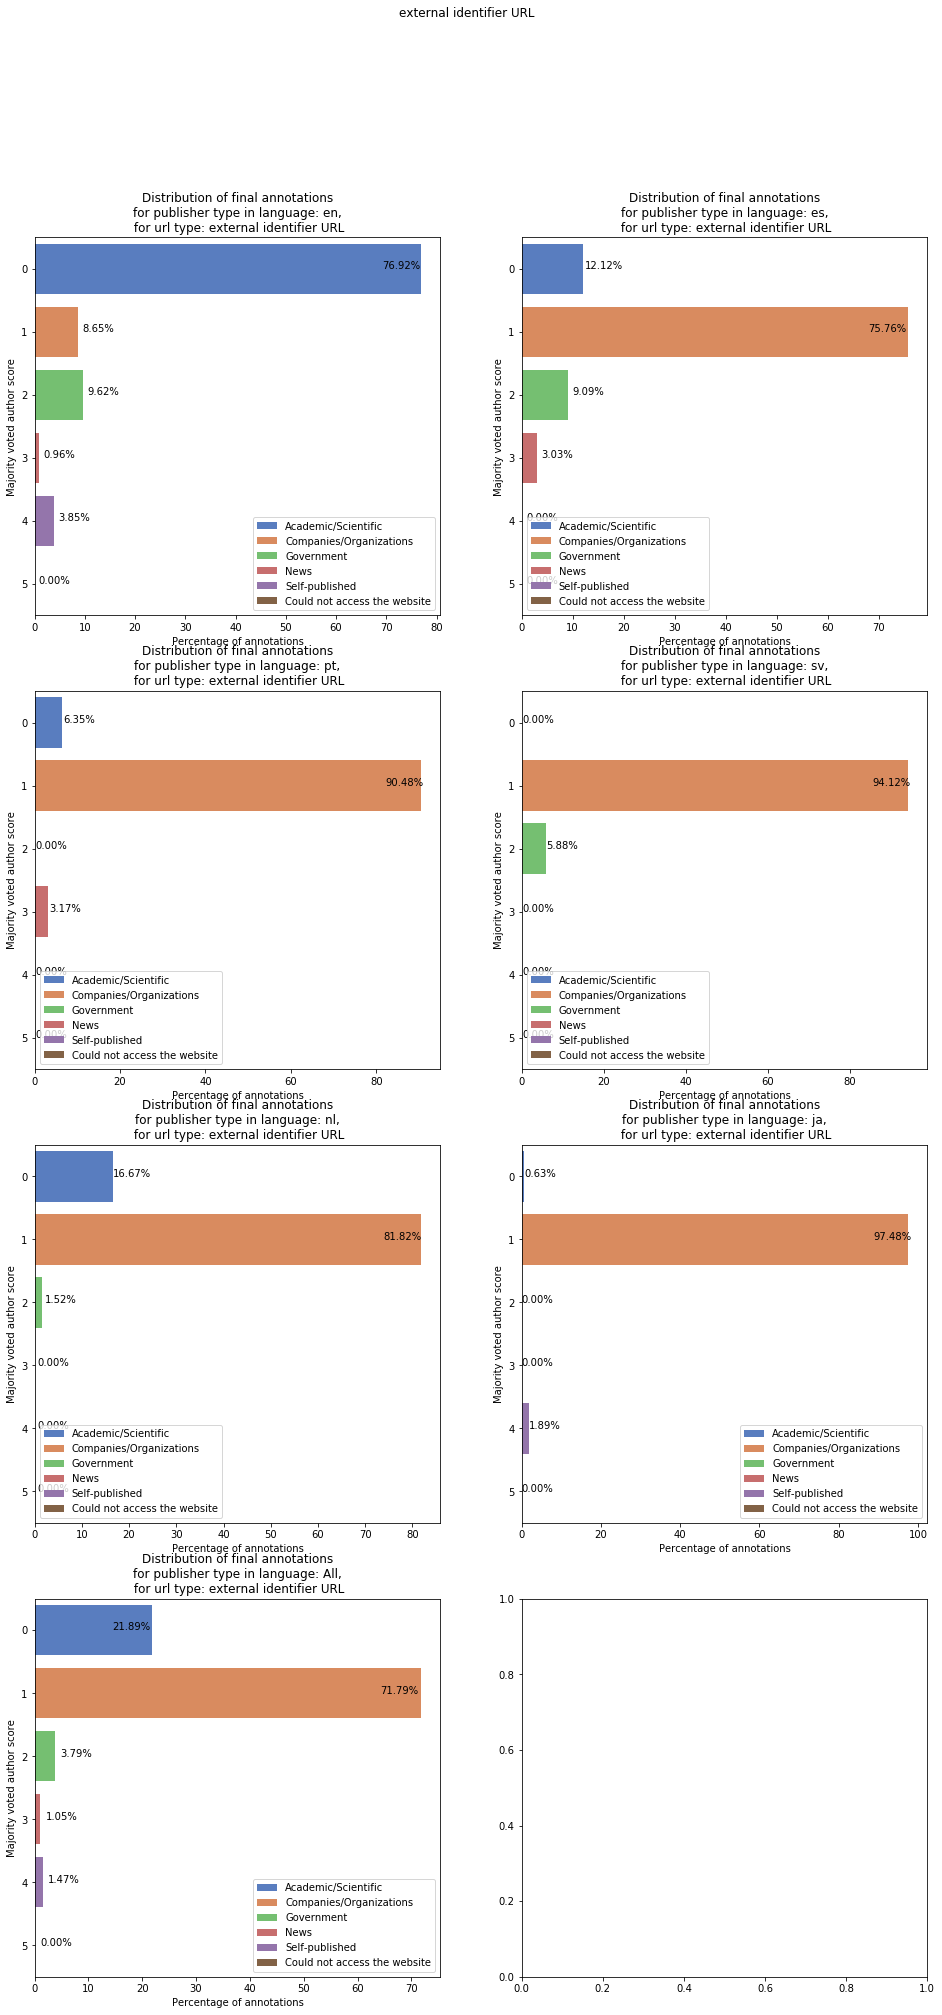

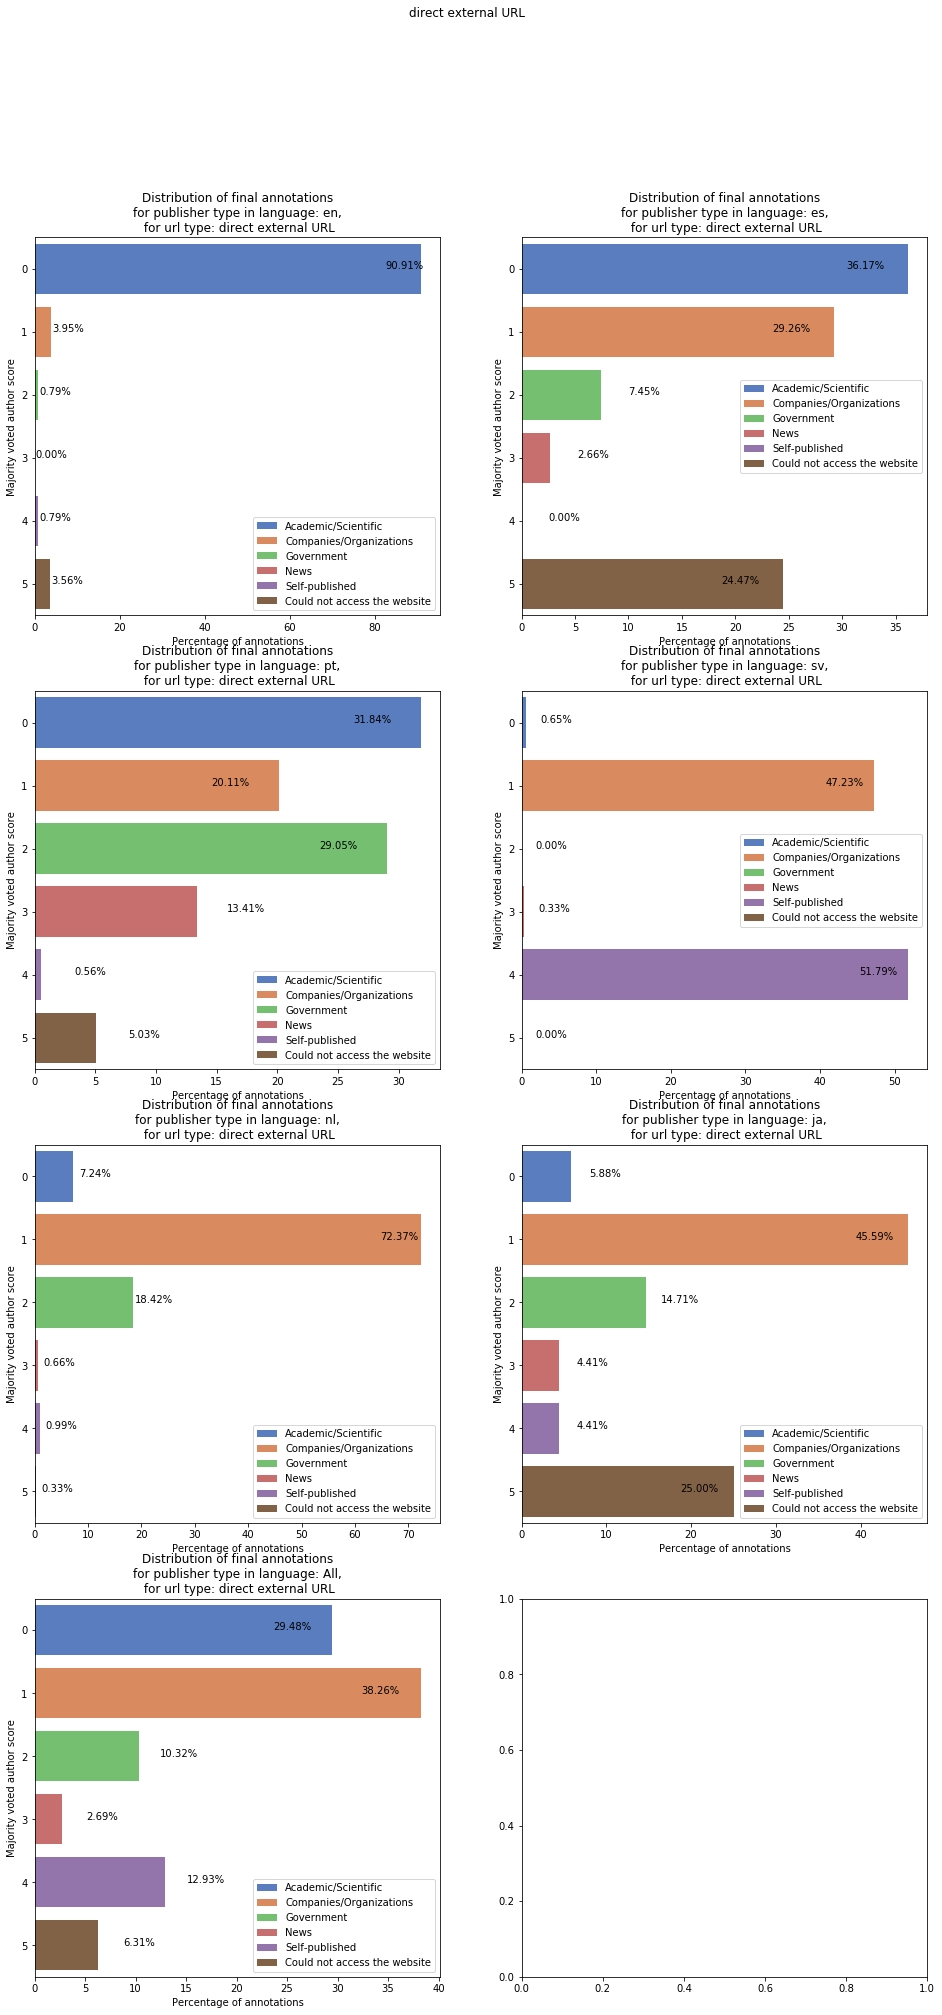

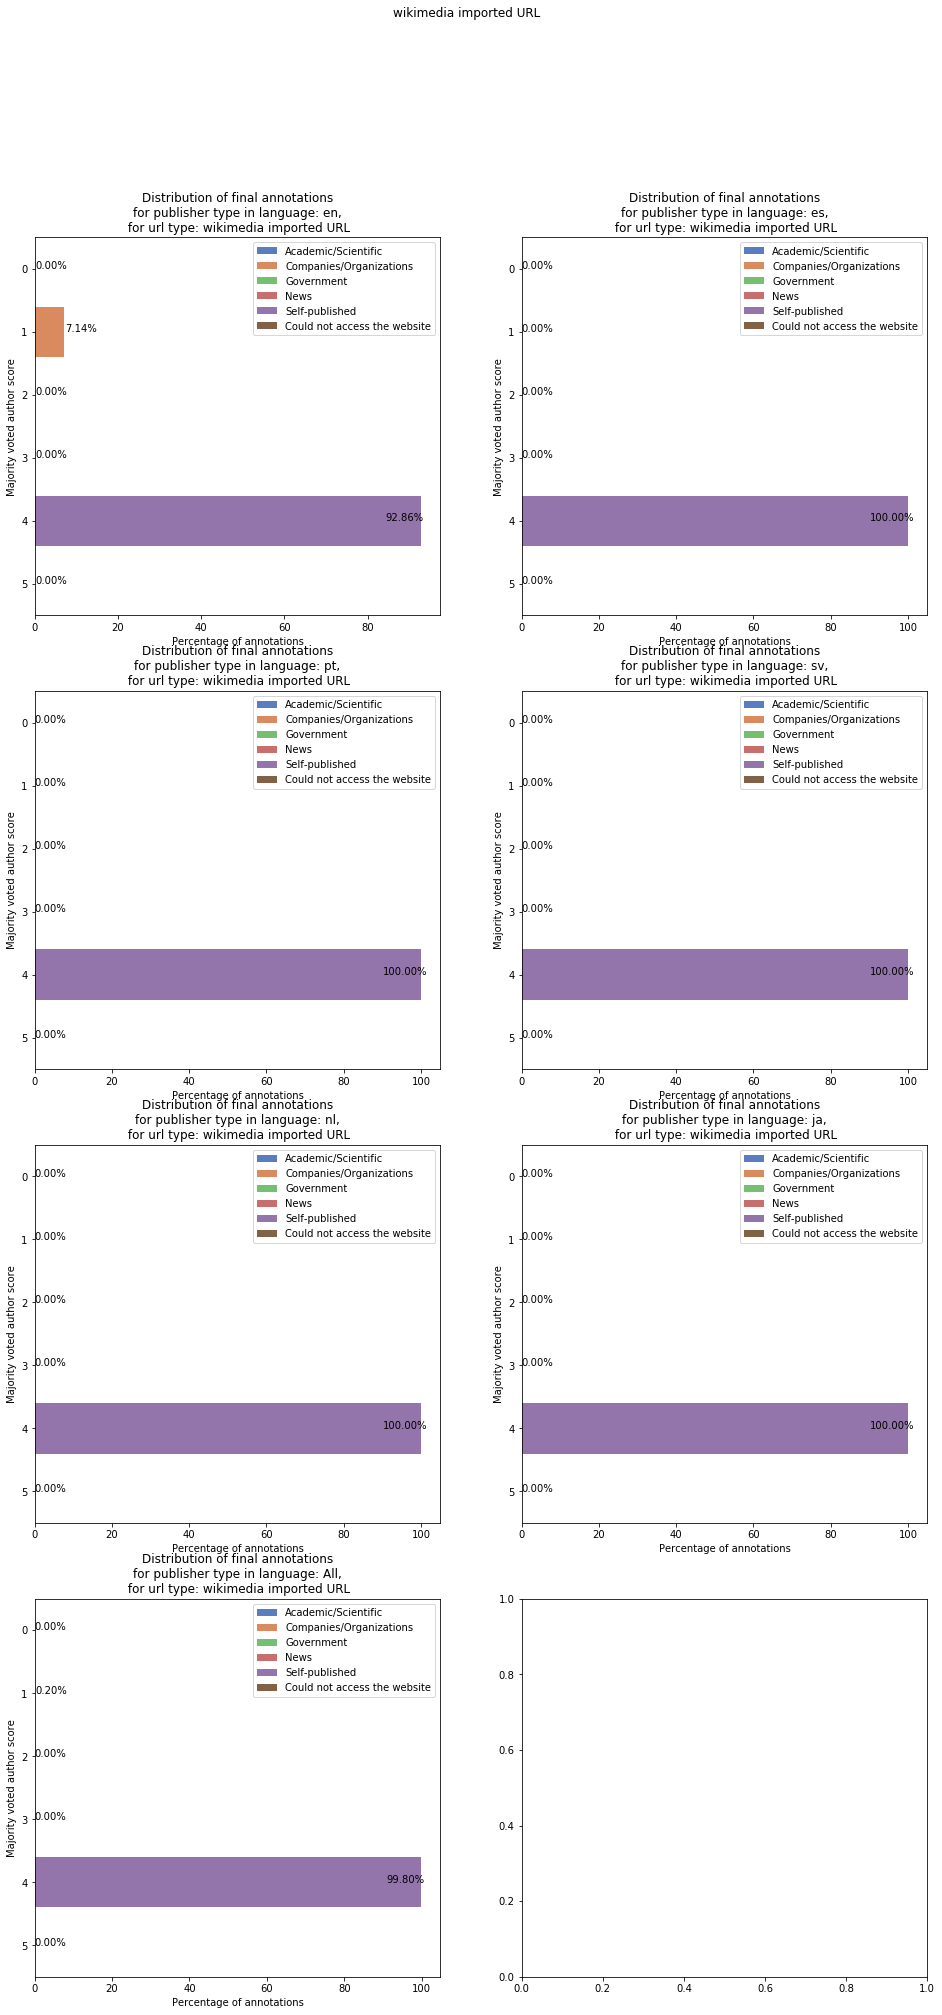

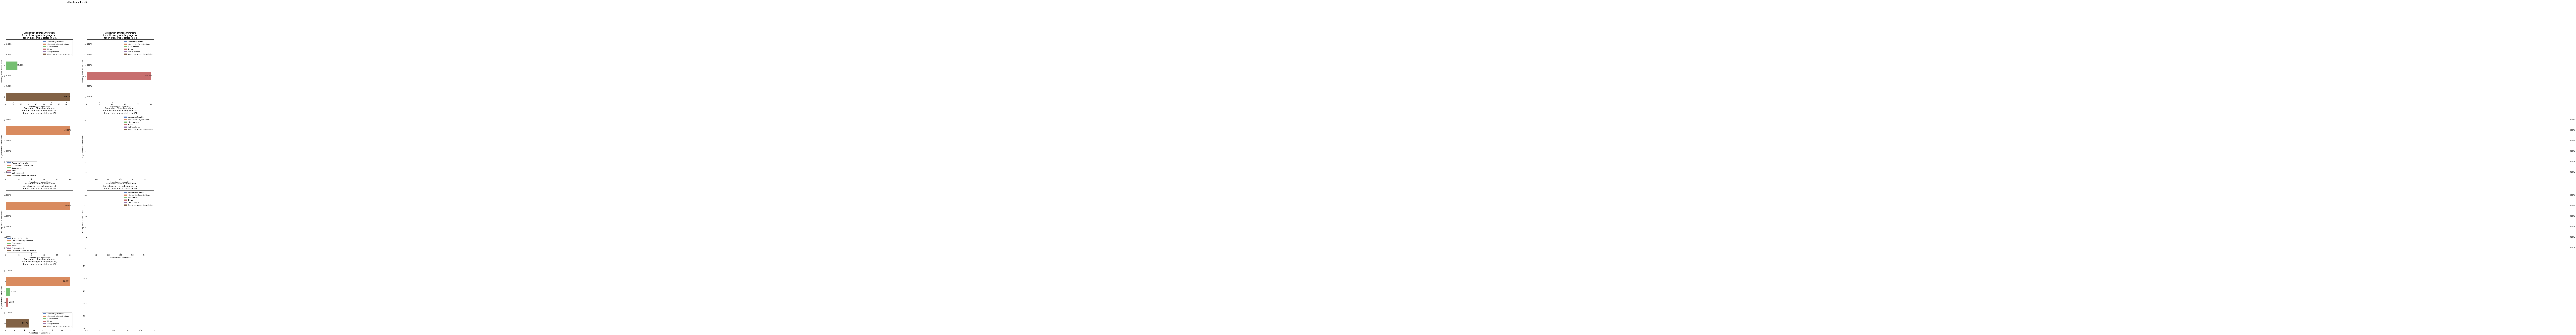

In [93]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(4,2,figsize=(16,32))

    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['publisher'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['publisher']/sum(annotations_df_lan['publisher'])

        for j in range(6):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'publisher':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 4, middle = 20, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor publisher type in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted author score'
        )
        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Academic/Scientific',
            'Companies/Organizations',
            'Government',
            'News',
            'Self-published',
            'Could not access the website',
        ])

    plt.show()

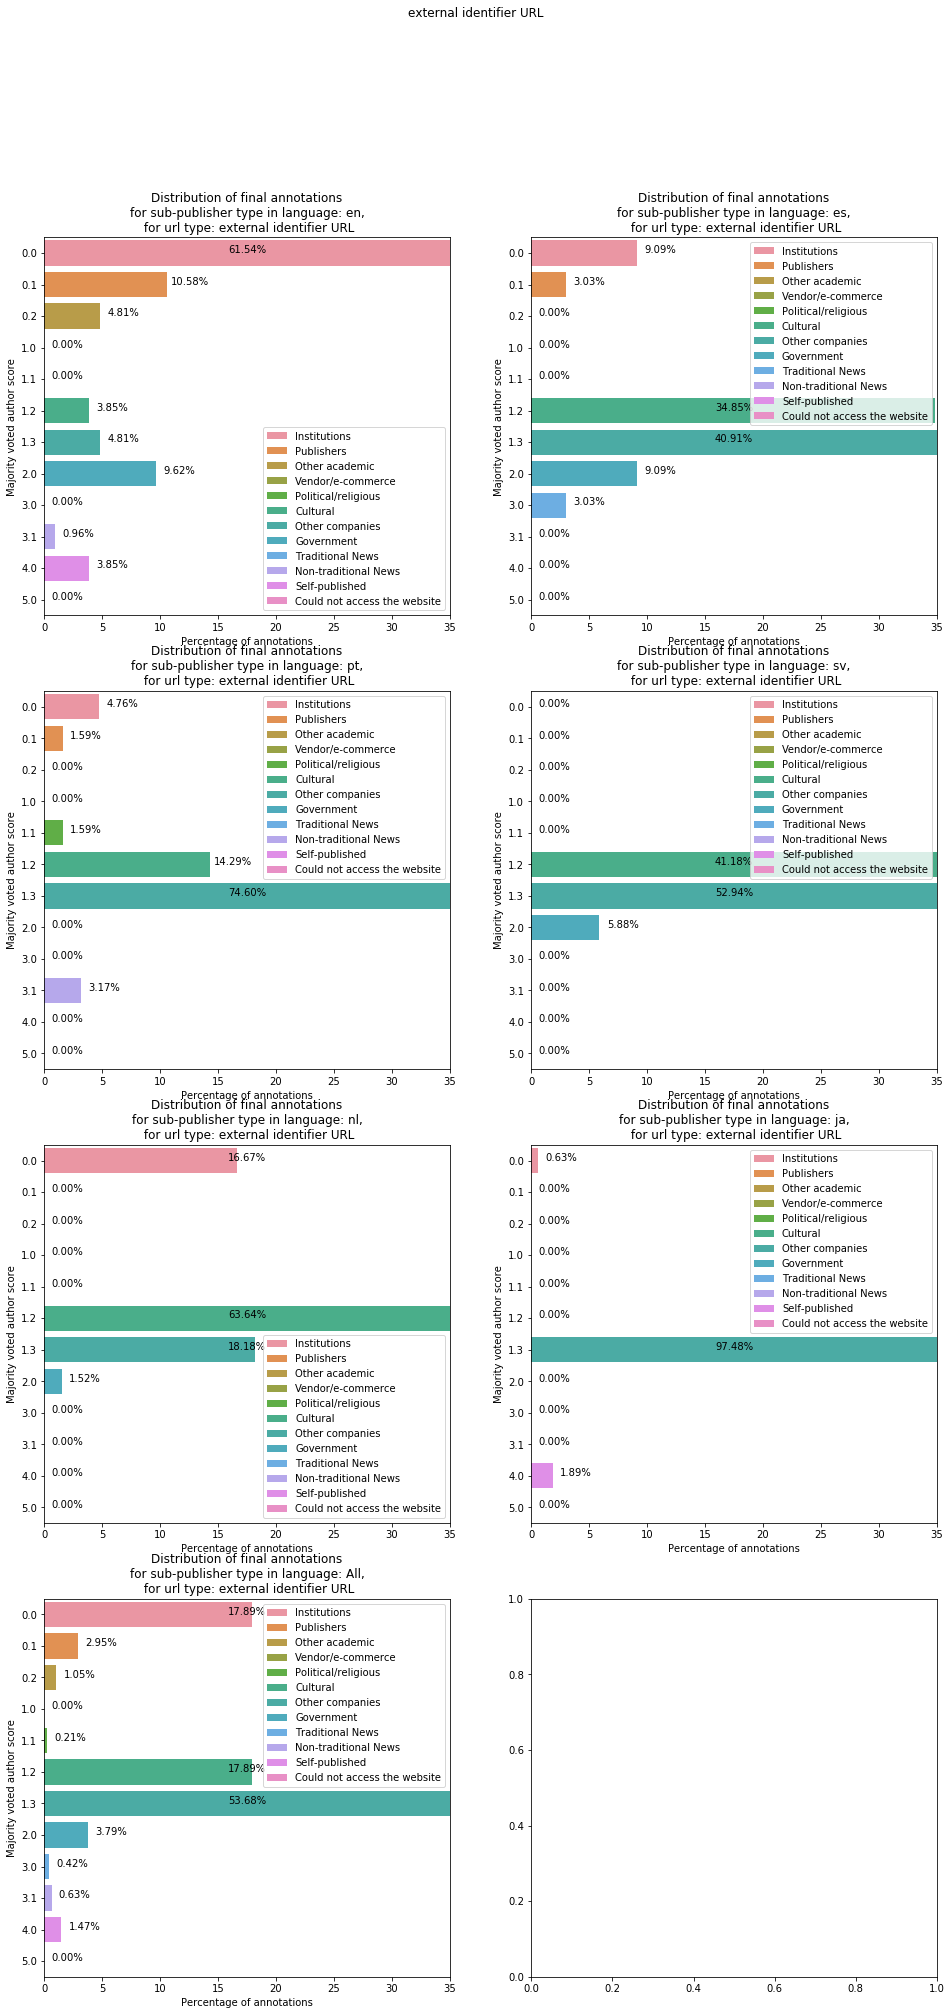

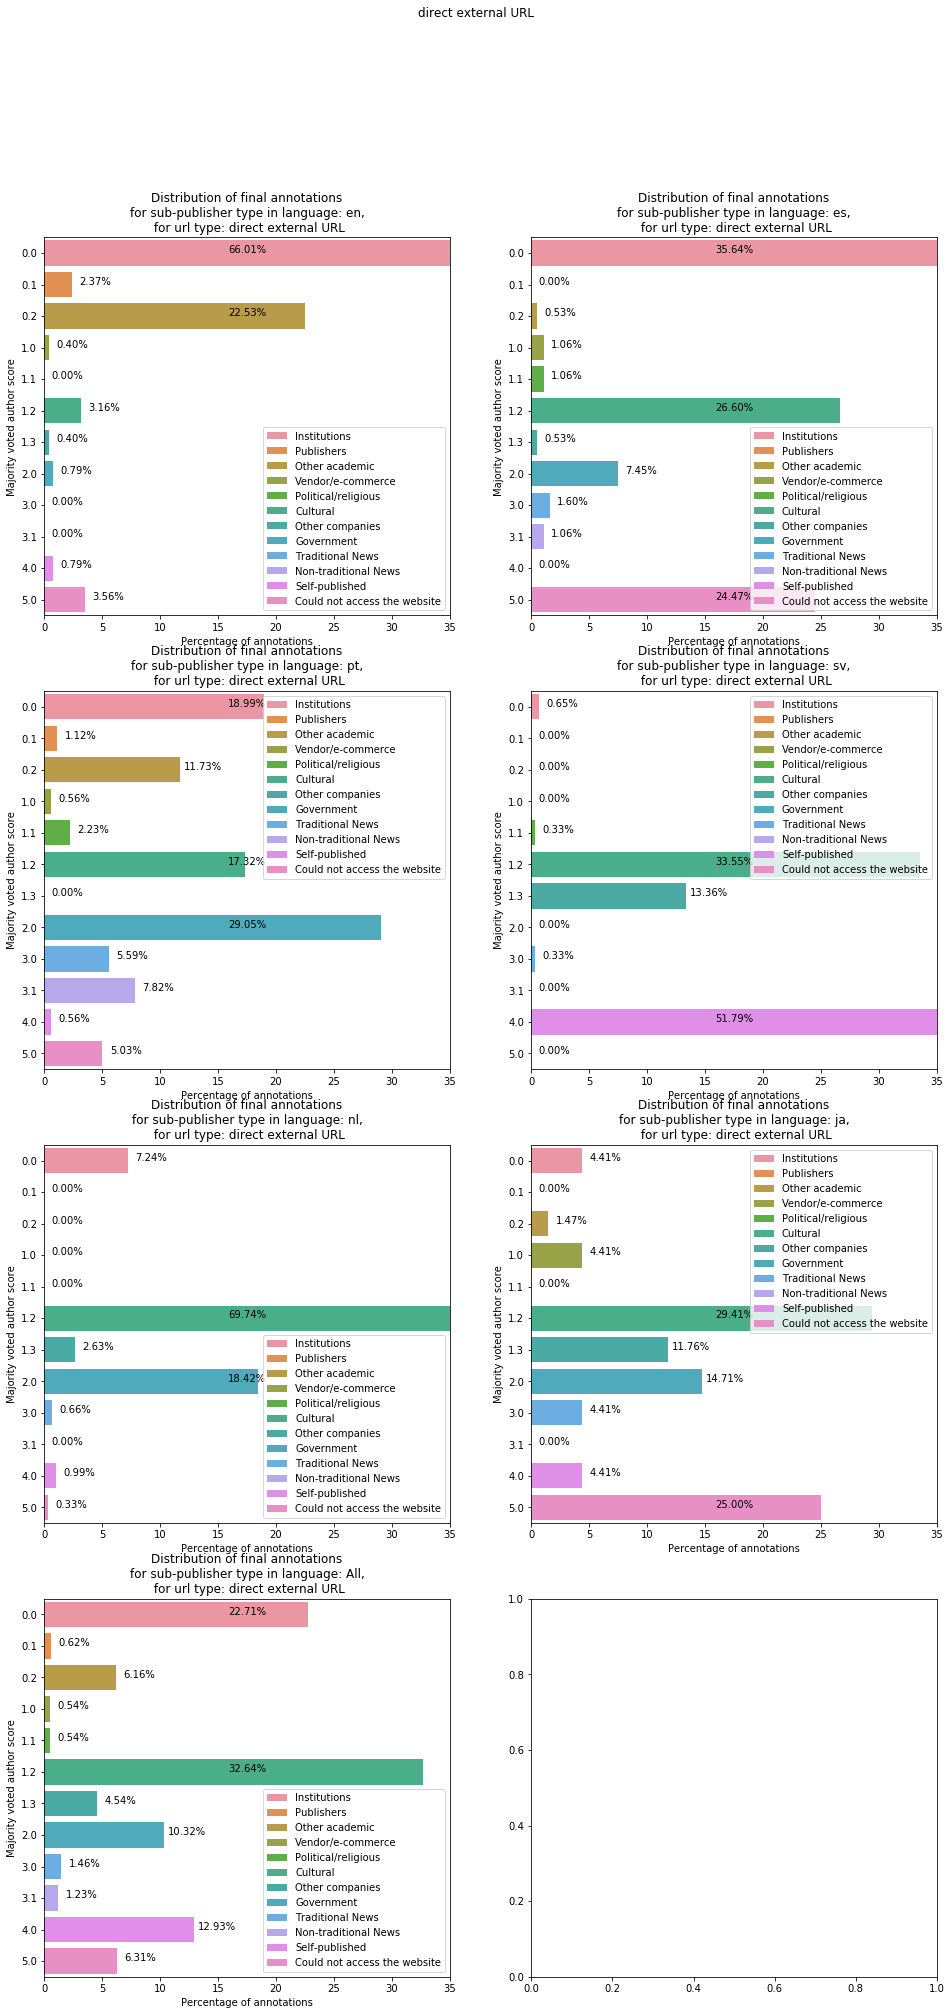

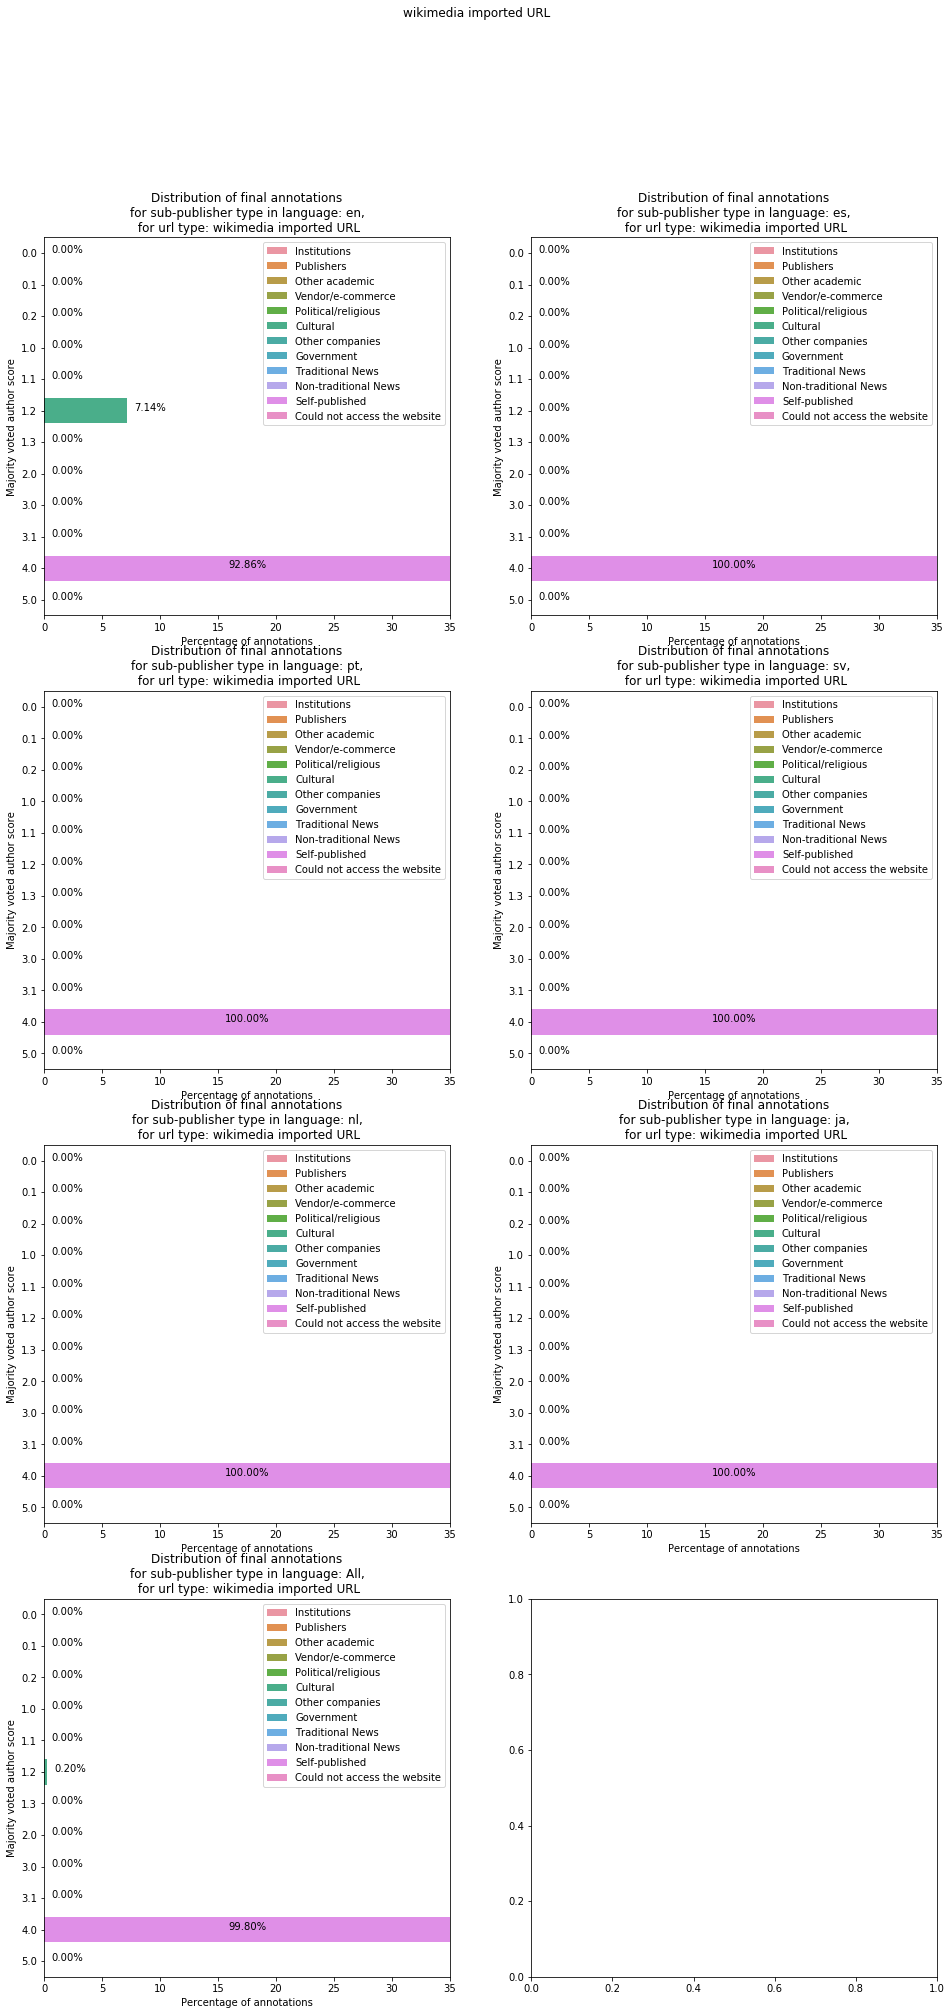

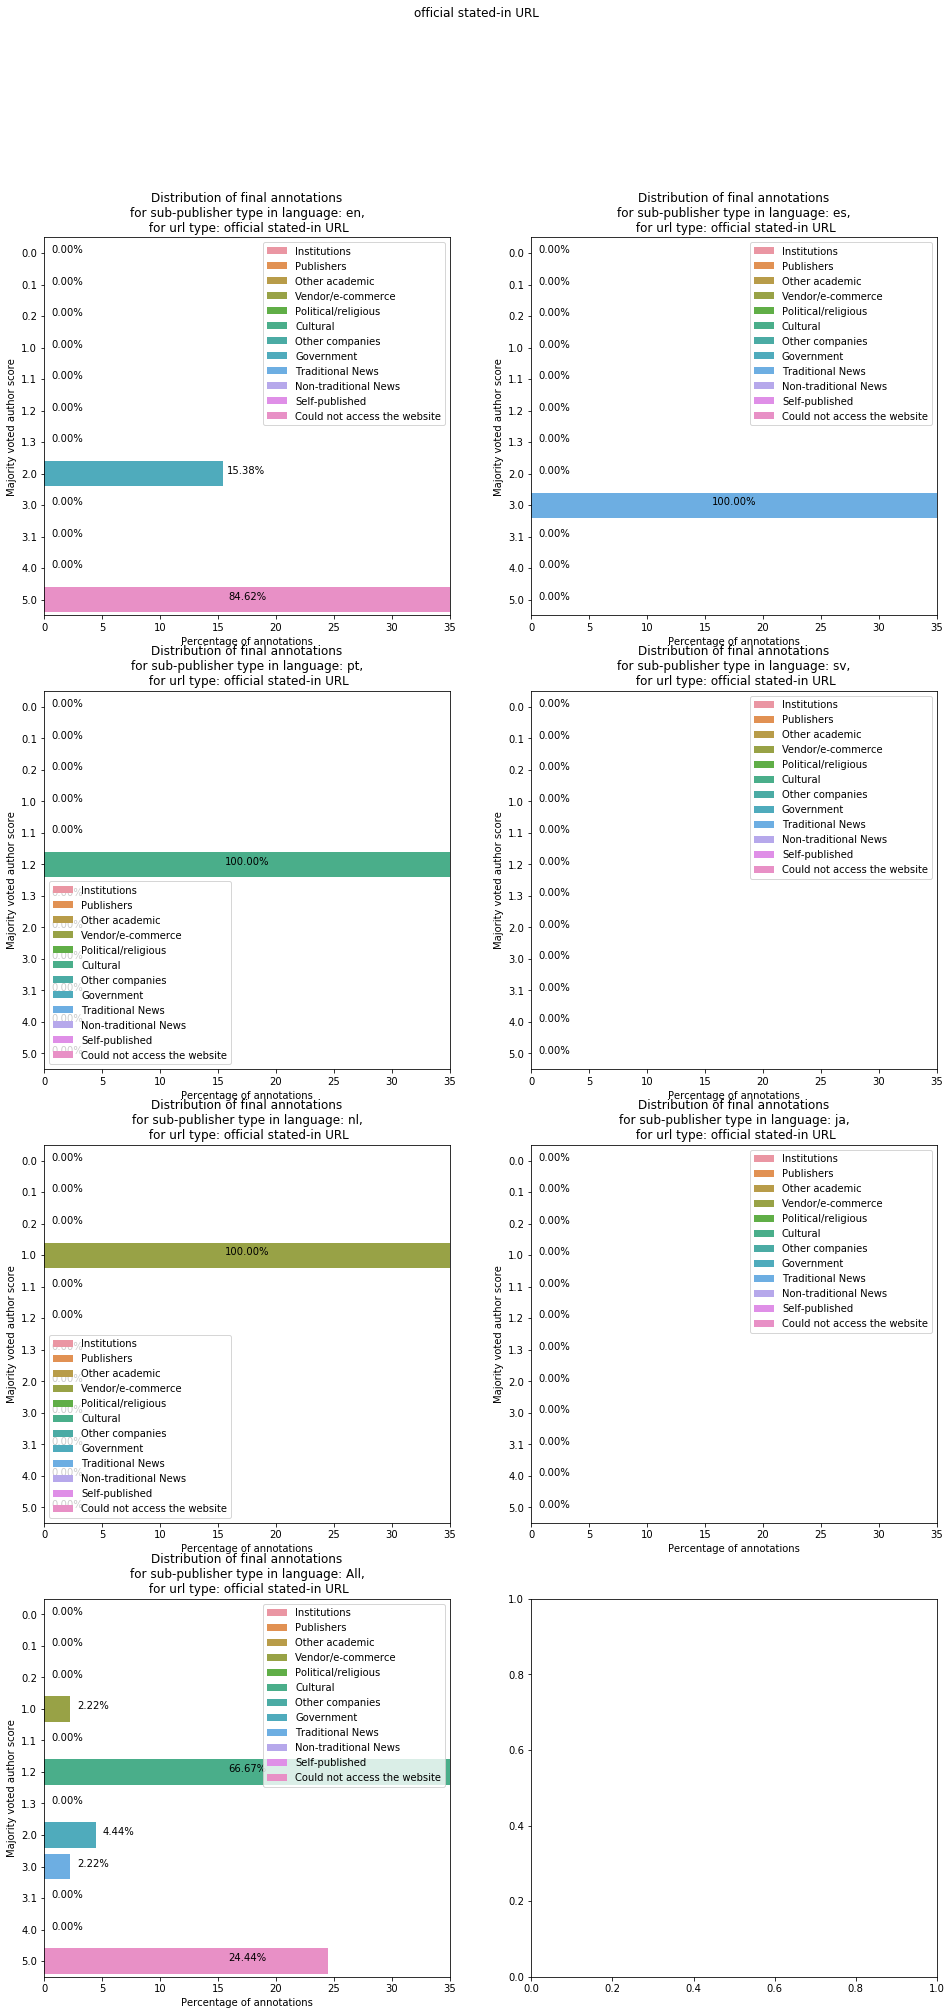

In [94]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(4,2,figsize=(16,32))

    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['long_sub_publisher'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['long_sub_publisher']/sum(annotations_df_lan['long_sub_publisher'])

        for j in [0.0,0.1,0.2,1.0,1.1,1.2,1.3,2.0,3.0,3.1,4.0,5.0]:
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'long_sub_publisher':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        ax[i//2,i%2].set_xlim([0,35])
        annotate_barplot(g, pad_x = 2, middle = 20, perc=True, limit_to_half=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor sub-publisher type in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted author score'
        )

        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Institutions',
            'Publishers',
            'Other academic',
            'Vendor/e-commerce',
            'Political/religious',
            'Cultural',
            'Other companies',
            'Government',
            'Traditional News',
            'Non-traditional News',
            'Self-published',
            'Could not access the website',
        ])

    plt.show()

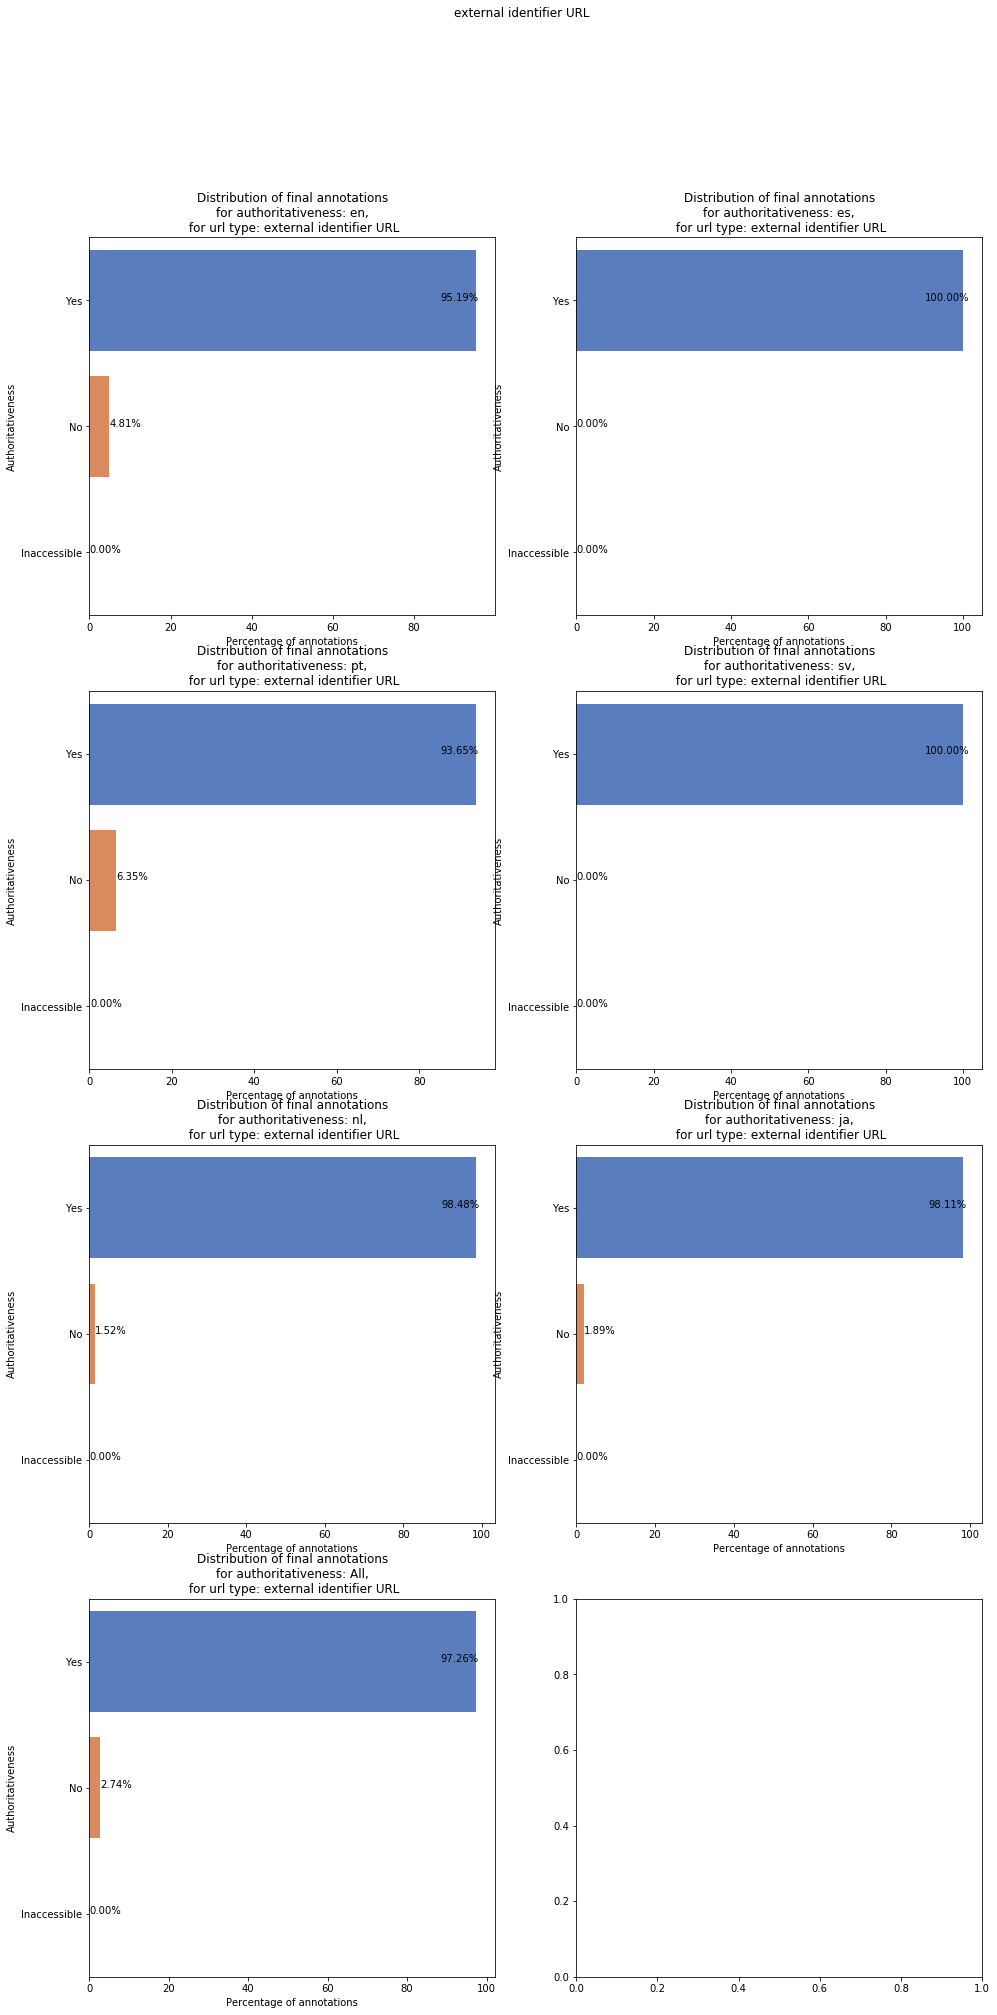

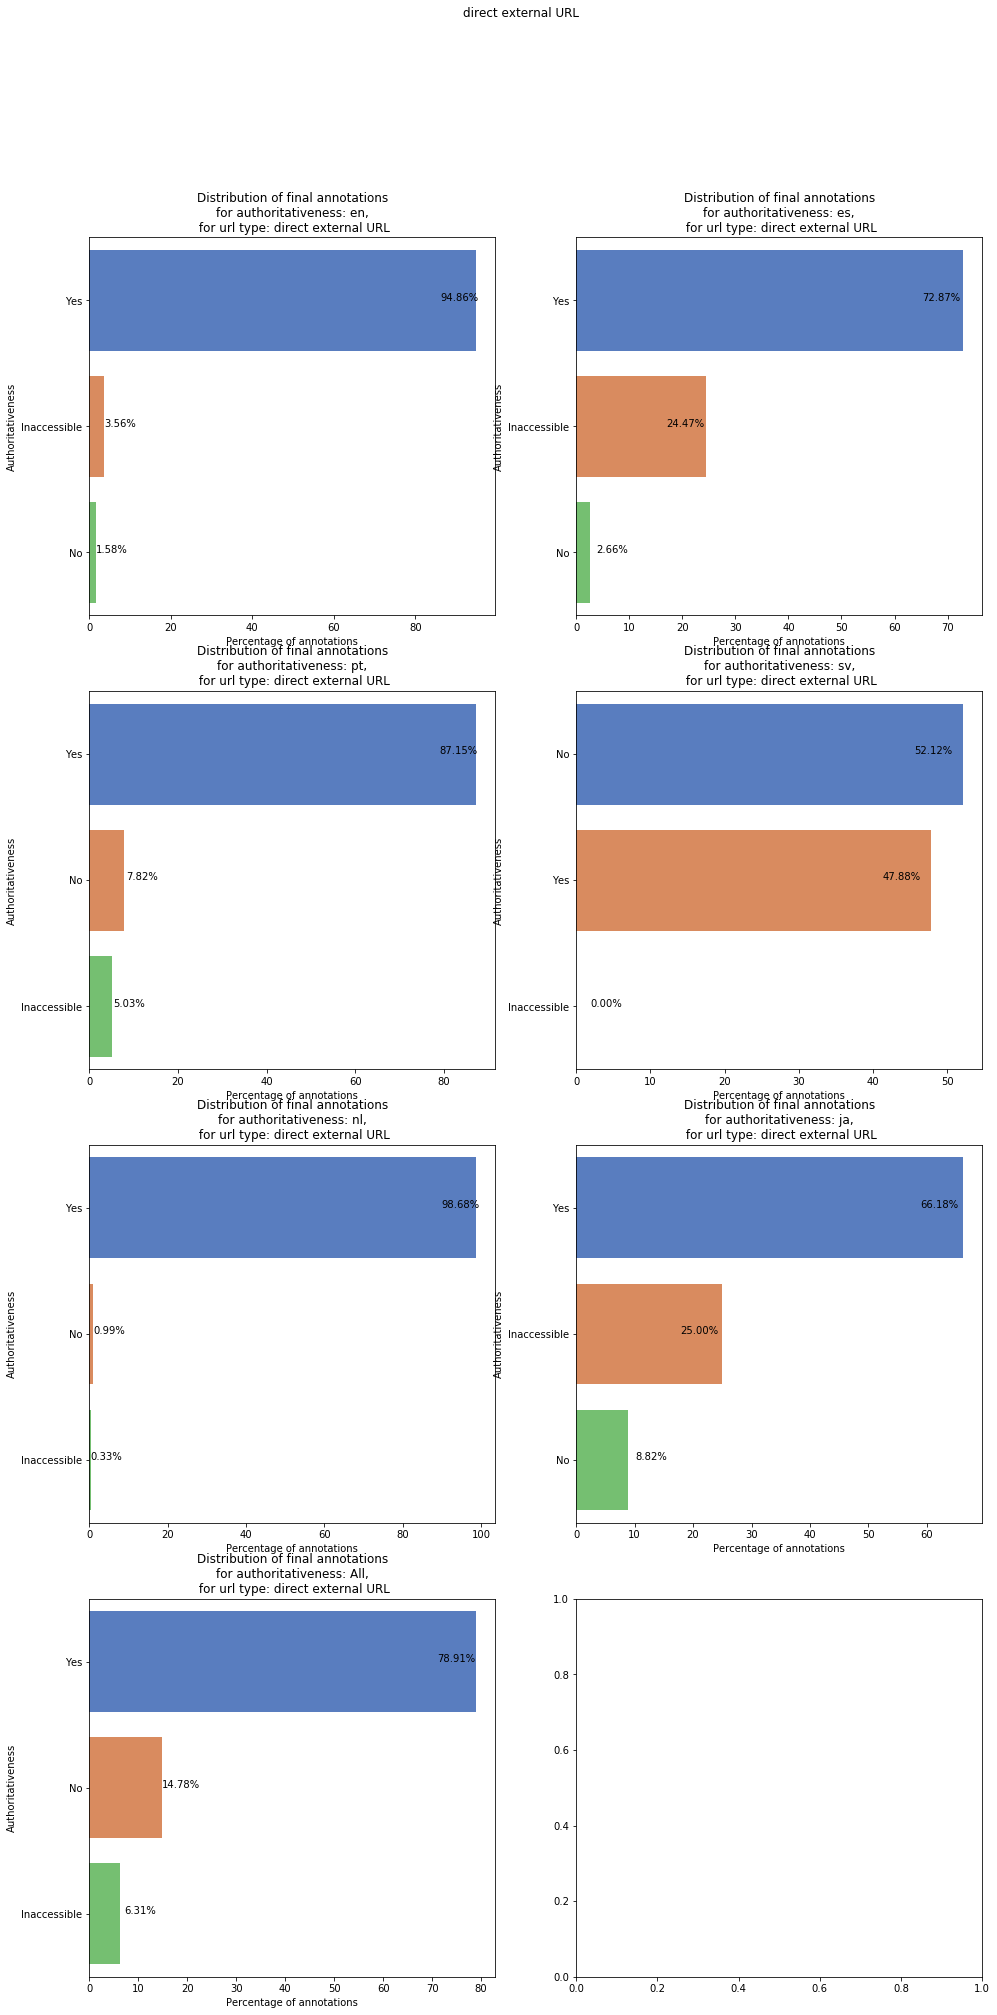

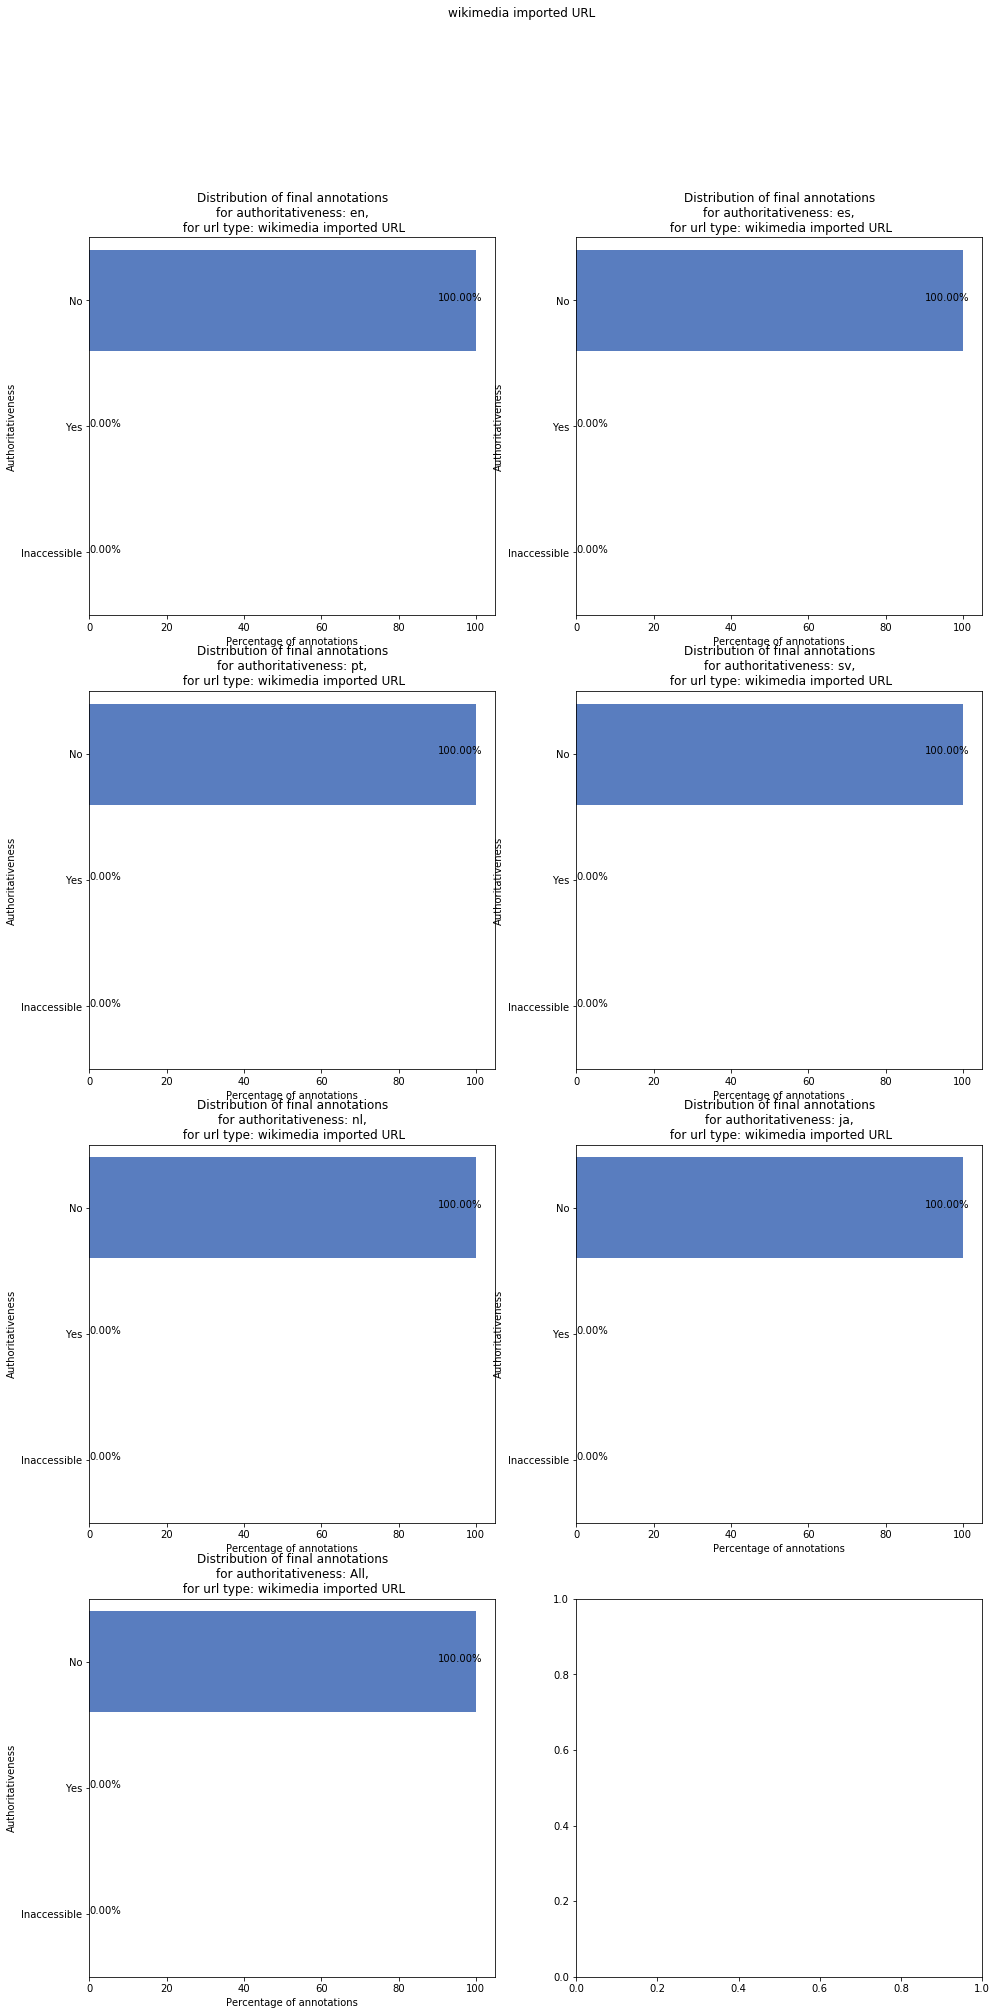

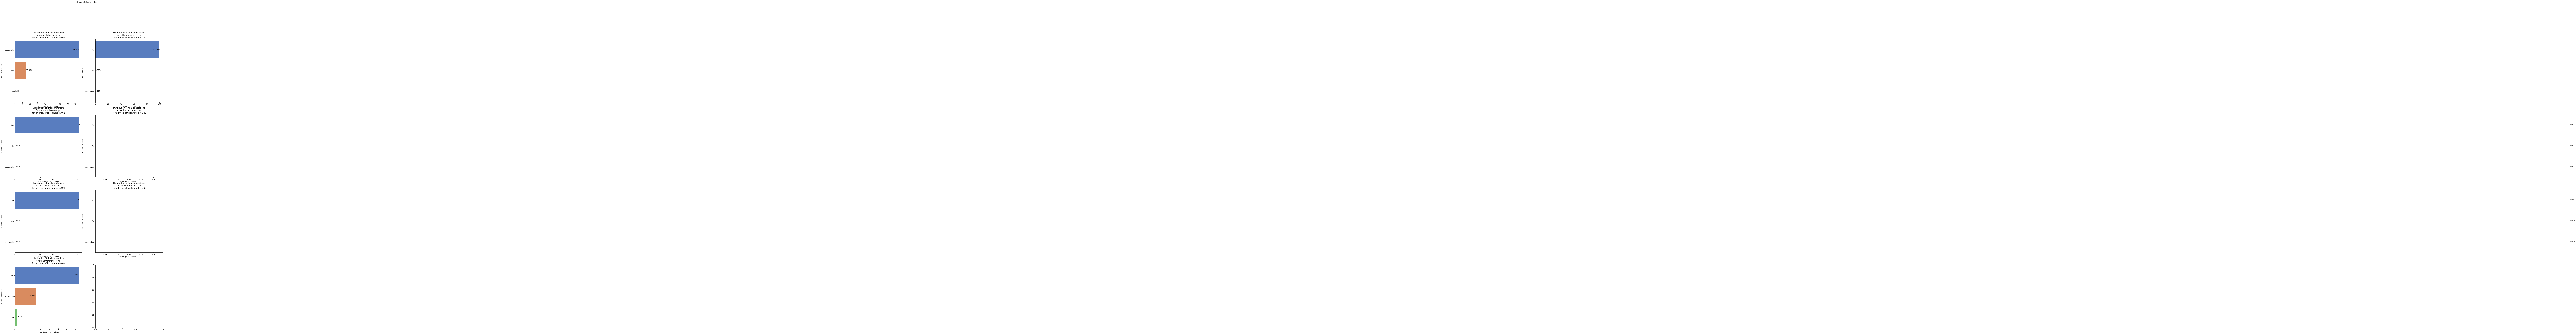

In [133]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(4,2,figsize=(16,32))

    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['authoritative'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['authoritative']/sum(annotations_df_lan['authoritative'])

        for j in ['Yes','No','Inaccessible']:
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'authoritative':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 4, middle = 20, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor authoritativeness: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted authoritativeness'
        )

    plt.show()